In [1]:
import numpy as np
import json
import matplotlib.pyplot as plt
from PIL import Image

from glob import glob
import earthpy as epy
import earthpy.spatial as es
import earthpy.plot as ep
import rasterio as rio
from matplotlib.colors import ListedColormap
import plotly.graph_objects as go

import torch
import torchvision
from torch.utils.data import DataLoader,Dataset
from skimage import io, transform
import torch.nn as nn
from torchvision import datasets, models, transforms

import time
import os
import cv2
import copy

In [4]:
path = "jpg_images/"
dot_jpg = ".jpg"
rndm_dirs = np.load("rndm_dir.npy")
import os
dir_list = os.listdir(path)
len(dir_list)

10000

(91, 91, 3)
(112, 112, 3)
tensor([[[ 22,  66,  33],
         [ 26,  71,  39],
         [ 35,  82,  55],
         ...,
         [ 34,  73,  62],
         [ 46,  83,  78],
         [ 46,  82,  78]],

        [[ 23,  67,  34],
         [ 24,  69,  37],
         [ 26,  70,  43],
         ...,
         [ 28,  61,  50],
         [ 41,  74,  68],
         [ 46,  79,  75]],

        [[ 26,  70,  37],
         [ 26,  67,  35],
         [ 23,  60,  33],
         ...,
         [ 20,  47,  36],
         [ 27,  53,  45],
         [ 30,  56,  52]],

        ...,

        [[ 71, 107, 134],
         [ 70, 106, 138],
         [ 73, 110, 145],
         ...,
         [  3,  24,  14],
         [  5,  24,  14],
         [  6,  22,  13]],

        [[ 74, 111, 137],
         [ 75, 111, 144],
         [ 74, 112, 149],
         ...,
         [  9,  32,  19],
         [  9,  29,  17],
         [  9,  26,  15]],

        [[ 78, 118, 144],
         [ 78, 116, 149],
         [ 74, 113, 150],
         ...,
        

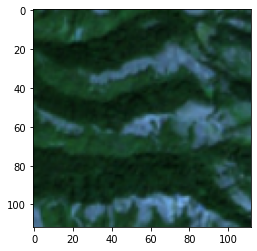

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([[[0.0863, 0.1020, 0.1373,  ..., 0.1333, 0.1804, 0.1804],
         [0.0902, 0.0941, 0.1020,  ..., 0.1098, 0.1608, 0.1804],
         [0.1020, 0.1020, 0.0902,  ..., 0.0784, 0.1059, 0.1176],
         ...,
         [0.2784, 0.2745, 0.2863,  ..., 0.0118, 0.0196, 0.0235],
         [0.2902, 0.2941, 0.2902,  ..., 0.0353, 0.0353, 0.0353],
         [0.3059, 0.3059, 0.2902,  ..., 0.0471, 0.0431, 0.0431]],

        [[0.2588, 0.2784, 0.3216,  ..., 0.2863, 0.3255, 0.3216],
         [0.2627, 0.2706, 0.2745,  ..., 0.2392, 0.2902, 0.3098],
         [0.2745, 0.2627, 0.2353,  ..., 0.1843, 0.2078, 0.2196],
         ...,
         [0.4196, 0.4157, 0.4314,  ..., 0.0941, 0.0941, 0.0863],
         [0.4353, 0.4353, 0.4392,  ..., 0.1255, 0.1137, 0.1020],
         [0.4627, 0.4549, 0.4431,  ..., 0.1490, 0.1333, 0.1294]],

        [[0.1294, 0.1529, 0.2157,  ..., 0.2431, 0.3059, 0.3059],
         [0.1333, 0.1451, 0.1686,  ..., 0.1961, 0.2667, 0.2941],
         [0.1451, 0.1373, 0.1294,  ..., 0.1412, 0.1765, 0.

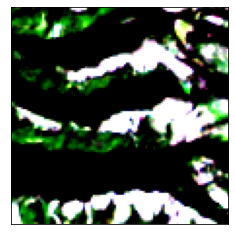

In [5]:
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

i = 1200
jpg = Image.open("jpg_images/"+rndm_dirs[i]+dot_jpg)
print(np.array(jpg).shape)
# im1 = jpg.crop((left, top, right, bottom))
newsize = (112, 112)
im1 = jpg.resize(newsize)
print(np.array(im1).shape)
print(torch.from_numpy(np.array(im1)))
plt.imshow(np.array(im1))
plt.show()
# define custom transform function
transform = transforms.Compose([
    transforms.ToTensor()
#     transforms.Normalize(mean, std)
])
# transform the pIL image to tensor 
# image
img_tr = transform(im1)
# calculate mean and std
print(img_tr)
mean, std = img_tr.mean([1,2]), img_tr.std([1,2])
# print mean and std
print("mean and std before normalize:")
print("Mean of the image:", mean)
print("Std of the image:", std)

# define custom transform function
transform2 = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])
# print(img_tr)
img_tr = transform2(im1)

img_np = np.array(img_tr)
  
# transpose from shape of (3,,) to shape of (,,3)
img_normalized = img_np.transpose(1, 2, 0)
  
# display the normalized image
plt.imshow(img_normalized)
plt.xticks([])
plt.yticks([])
plt.show()

In [6]:
# shuffled set of random directories
rndm_dirs = np.load("rndm_dir.npy")
tenk = rndm_dirs[:10000]
print(tenk[:2])
print(len(tenk))
y = np.load("np_labels.npy",allow_pickle=True)
print(y[:2])
print(len(y))

['S2A_MSIL2A_20171221T112501_84_49' 'S2A_MSIL2A_20171221T112501_3_4']
10000
[array(['Vineyards', 'Olive groves', 'Agro-forestry areas',
       'Transitional woodland/shrub', 'Water bodies'], dtype='<U27')
 array(['Discontinuous urban fabric', 'Complex cultivation patterns',
       'Land principally occupied by agriculture, with significant areas of natural vegetation',
       'Broad-leaved forest', 'Coniferous forest', 'Mixed forest',
       'Transitional woodland/shrub'], dtype='<U86')]
10000


In [14]:
l = []
for i in y:
    for j in i:
        l.append(j)
li = l.copy()
l = sorted(l)
l = np.array(l)
uni = np.unique(l)
print(uni.shape)
# uni = uni.sort()
print(uni)
print(uni.shape[0])

(43,)
['Agro-forestry areas' 'Airports'
 'Annual crops associated with permanent crops' 'Bare rock'
 'Beaches, dunes, sands' 'Broad-leaved forest' 'Burnt areas'
 'Coastal lagoons' 'Complex cultivation patterns' 'Coniferous forest'
 'Construction sites' 'Continuous urban fabric'
 'Discontinuous urban fabric' 'Dump sites' 'Estuaries'
 'Fruit trees and berry plantations' 'Green urban areas'
 'Industrial or commercial units' 'Inland marshes' 'Intertidal flats'
 'Land principally occupied by agriculture, with significant areas of natural vegetation'
 'Mineral extraction sites' 'Mixed forest' 'Moors and heathland'
 'Natural grassland' 'Non-irrigated arable land' 'Olive groves' 'Pastures'
 'Peatbogs' 'Permanently irrigated land' 'Port areas' 'Rice fields'
 'Road and rail networks and associated land' 'Salines' 'Salt marshes'
 'Sclerophyllous vegetation' 'Sea and ocean' 'Sparsely vegetated areas'
 'Sport and leisure facilities' 'Transitional woodland/shrub' 'Vineyards'
 'Water bodies' 'Water c

In [8]:
f_list = []
for i in y:
    i_list = np.zeros(43)
    for j in i:
        if j in uni:
            idx = np.where(uni == j)
            i_list[idx] = 1
    f_list.append(i_list)
f_list = np.array(f_list)
print(y[-3])
print(f_list[-3])
print(y[3])
print(f_list[3])

['Sea and ocean']
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
['Non-irrigated arable land']
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [9]:
from sklearn.model_selection import train_test_split
train_set, test_set, y_train, y_test = train_test_split(tenk, f_list, test_size=0.2)

In [10]:
from PIL import Image

mean=[0.1935, 0.2611, 0.2164]
std=[0.1949, 0.1717, 0.1809]

train_transform = transforms.Compose([
                transforms.ToTensor(),
                transforms.Normalize(mean,std)
])
 
test_transform =transforms.Compose([
                transforms.ToTensor(),
                transforms.Normalize(mean,std),
])
 



class ImageDataset(Dataset):
    def __init__(self,Images,labels,img_folder,transform):
        self.transform=transform
        self.img_folder=img_folder
        self.image_names=Images
        self.labels=labels

    #The __len__ function returns the number of samples in our dataset.
    def __len__(self):
        return len(self.image_names)


    def __getitem__(self,index):
        image = Image.open(self.img_folder+self.image_names[index]+'.jpg')
        newsize = (112, 112)
        image = image.resize(newsize)
        image = self.transform(image)
        targets=torch.from_numpy(self.labels[index].ravel())
#         .ravel()
#         .reshape(-1,1)

#         sample = {'image': image,'labels':targets}

        return image, targets

img_folder = "jpg_images/"
train_dataset=ImageDataset(train_set,y_train,img_folder,train_transform)
test_dataset=ImageDataset(test_set,y_test,img_folder,test_transform)

In [11]:
train_dl = DataLoader(
    train_dataset, 
    batch_size=32,
    shuffle=True
)
 
test_dl = DataLoader(
    test_dataset, 
    batch_size=32,
    shuffle=True
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], dtype=torch.float64)


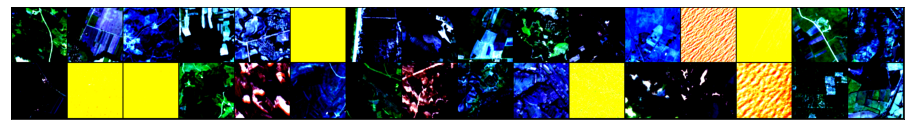

In [20]:
from torchvision.utils import make_grid
import matplotlib.pyplot as plt


def show_batch(dl):
    """Plot images grid of single batch"""
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(16, 12))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        print(labels)
        break


show_batch(train_dl)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], dtype=torch.float64)


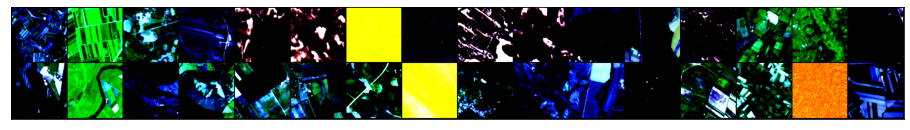

In [21]:
from torchvision.utils import make_grid
import matplotlib.pyplot as plt


def show_batch(dl):
    """Plot images grid of single batch"""
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(16, 12))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        print(labels)
        break


show_batch(test_dl)

In [22]:
from sklearn.metrics import hamming_loss
y_pred = [0, 1, 0, 0]
y_true = [0, 1, 0, 1]
hamming_loss(y_true, y_pred)

0.25

In [23]:
def Accuracy(y_true, y_pred):
    temp = 0
    for i in range(y_true.shape[0]):
        temp += sum(torch.logical_and(y_true[i], y_pred[i])) / sum(torch.logical_or(y_true[i], y_pred[i]))
    return temp / y_true.shape[0]

def Precision(y_true, y_pred):
    temp = 0
    for i in range(y_true.shape[0]):
        if sum(y_true[i]) == 0:
            continue
        temp+= sum(torch.logical_and(y_true[i], y_pred[i]))/ sum(y_true[i])
    return temp/ y_true.shape[0]

def Recall(y_true, y_pred):
    temp = 0
    for i in range(y_true.shape[0]):
        if sum(y_pred[i]) == 0:
            continue
        temp+= sum(torch.logical_and(y_true[i], y_pred[i]))/ sum(y_pred[i])
    return temp/ y_true.shape[0]

In [24]:
test1 = y_train[0:128]
test2 = y_train[128:256]
hamming_loss(test1, test2)

0.10337936046511628

In [25]:
op = [[-0.3584,  0.3563, -0.4308,  0.3011, -0.7915, -0.1220, -0.8985,  0.0053,
          0.2009, -0.0446,  0.2737, -0.4603,  0.7363,  1.0597,  0.8121,  0.0519,
          0.5265, -0.8993,  0.6154, -1.3274,  0.0468,  0.4461, -0.2856,  0.1116,
         -0.1986,  0.2851, -1.1574, -0.0284, -0.0336, -0.9451, -0.0511,  0.0717,
          0.0277,  0.4630,  0.0535, -0.0467,  0.3222,  0.1469,  0.0954, -0.2320,
         -0.2322,  1.7434, -0.3346],
        [-0.0159,  0.0315, -0.4523,  0.3597, -0.0956,  0.0183,  0.2601, -0.0125,
          0.6624, -0.0850, -0.6545, -0.6990, -0.0637, -0.0062,  0.5765, -0.9418,
          0.0360, -0.9116,  0.6659, -0.3967,  0.7651, -0.0531,  0.3492, -0.4688,
          0.4121,  0.3066, -1.3589, -0.8284, -0.4178, -0.1143, -0.2084,  0.5743,
          0.7340,  0.3777,  1.1875,  0.4143,  0.2443, -0.1885,  0.4443,  0.1344,
         -0.3848,  1.1297, -0.4943],
        [-0.3879,  0.3634, -1.7016,  0.1396, -0.2956, -0.0564,  0.0666,  0.8396,
          1.4770, -1.6862,  0.4347, -0.5309,  1.1794, -0.8870,  1.2279, -1.4133,
          0.3215, -1.1762,  1.5941, -1.7271,  1.2688,  0.2037,  0.0851, -0.1332,
          0.5917, -0.2250, -1.6143, -1.6480,  0.5909, -0.7133,  0.1369,  0.4165,
          0.3652,  1.6924,  1.6156,  0.7264,  1.2620, -0.1911,  0.9064,  0.4901,
         -0.3037,  1.9810, -1.0097],
        [ 0.0094, -0.0888, -0.4688,  0.3850, -0.3562,  0.2135,  0.5761,  0.0209,
          0.0899,  0.1020, -1.1845, -0.9851,  0.9619, -0.0735,  0.6422, -0.6835,
         -0.1644, -0.9603,  0.6636, -0.1297,  0.2763,  0.3228, -0.2175,  0.2175,
          0.0069,  0.4773, -1.0563, -0.8089,  0.0435, -1.0042, -0.2553,  0.3410,
          0.8659,  0.9212,  0.6292,  0.3217, -0.2893, -0.3440,  0.5774,  0.5053,
          0.0585,  1.1129, -0.7826]]
op = np.array(op)
op = torch.from_numpy(op)
# print(op)
op = torch.sigmoid(op)
print(op)


tensor([[0.4113, 0.5881, 0.3939, 0.5747, 0.3118, 0.4695, 0.2894, 0.5013, 0.5501,
         0.4889, 0.5680, 0.3869, 0.6762, 0.7426, 0.6926, 0.5130, 0.6287, 0.2892,
         0.6492, 0.2096, 0.5117, 0.6097, 0.4291, 0.5279, 0.4505, 0.5708, 0.2391,
         0.4929, 0.4916, 0.2799, 0.4872, 0.5179, 0.5069, 0.6137, 0.5134, 0.4883,
         0.5799, 0.5367, 0.5238, 0.4423, 0.4422, 0.8511, 0.4171],
        [0.4960, 0.5079, 0.3888, 0.5890, 0.4761, 0.5046, 0.5647, 0.4969, 0.6598,
         0.4788, 0.3420, 0.3320, 0.4841, 0.4985, 0.6403, 0.2805, 0.5090, 0.2867,
         0.6606, 0.4021, 0.6825, 0.4867, 0.5864, 0.3849, 0.6016, 0.5761, 0.2044,
         0.3040, 0.3970, 0.4715, 0.4481, 0.6398, 0.6757, 0.5933, 0.7663, 0.6021,
         0.5608, 0.4530, 0.6093, 0.5335, 0.4050, 0.7558, 0.3789],
        [0.4042, 0.5899, 0.1543, 0.5348, 0.4266, 0.4859, 0.5166, 0.6984, 0.8141,
         0.1563, 0.6070, 0.3703, 0.7648, 0.2917, 0.7735, 0.1957, 0.5797, 0.2357,
         0.8312, 0.1510, 0.7805, 0.5507, 0.5213, 0.4667, 0

In [26]:
def one_hot_encoding(ops):
    onezero = []
    for i in ops:
        oz = torch.zeros(43)
        for j in range(len(i)):
            if i[j] > 0.5:
                oz[j] = 1
        onezero.append(oz)
    onezero = torch.stack(onezero)
    return onezero

def one_hot_for_single(ops):
    oz = torch.zeros(43)
    for i in range(len(ops)):
        if ops[i] > 0.5:
            oz[i] = 1
    return oz
print(one_hot_encoding(op))
print(type(one_hot_encoding(op)))
print(one_hot_encoding(op).shape)

tensor([[0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0.,
         1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
         1., 1., 1., 0., 0., 1., 0.],
        [0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
         1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
         1., 0., 1., 1., 0., 1., 0.],
        [0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
         1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
         1., 0., 1., 1., 0., 1., 0.],
        [1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0.,
         1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1.,
         0., 0., 1., 1., 1., 1., 0.]])
<class 'torch.Tensor'>
torch.Size([4, 43])


In [27]:
test2 = torch.from_numpy(y_train[0:4])
print(test2)
print(type(test2))
print(test2.shape)

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.]], dtype=torch.float64)
<class 'torch.Tensor'>
torch.Size([4, 43])


In [28]:
print(Accuracy(test2, one_hot_encoding(op)))
print(Accuracy(test2, one_hot_encoding(op))*100)

tensor(0.0411)
tensor(4.1108)


In [29]:
print(Precision(test2, one_hot_encoding(op)))
print(Precision(test2, one_hot_encoding(op))*100)

tensor(0.5833, dtype=torch.float64)
tensor(58.3333, dtype=torch.float64)


In [30]:
print(Recall(test2, one_hot_encoding(op)))
print(Recall(test2, one_hot_encoding(op))*100)

tensor(0.0428)
tensor(4.2774)


In [31]:
m = nn.Sigmoid()
input = torch.randn(2)
print(input)
output = m(input)
print(output)

tensor([0.3848, 1.4772])
tensor([0.5950, 0.8142])


In [32]:
model = models.resnet50(pretrained=True)
# model = model.cuda() if device else net
# model.to(device)
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [33]:
num_ftrs = model.fc.in_features
num_ftrs

2048

In [34]:
model.fc = nn.Linear(num_ftrs,43)
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [35]:
for i, (images, labels) in enumerate(train_dl):
    print(i)
    print(images[:4])
    print(labels[:4])

0
tensor([[[[-0.4697, -0.4898, -0.2282,  ..., -0.5502, -0.6508, -0.7111],
          [-0.4697, -0.5099, -0.1679,  ..., -0.6105, -0.7111, -0.7312],
          [-0.4496, -0.5099, -0.0874,  ..., -0.7514, -0.7916, -0.7916],
          ...,
          [-0.6709, -0.7715, -0.8318,  ..., -0.8117, -0.7916, -0.8117],
          [-0.6306, -0.6910, -0.7715,  ..., -0.7715, -0.7916, -0.7715],
          [-0.7111, -0.6910, -0.6910,  ..., -0.7514, -0.7916, -0.7514]],

         [[-0.5614, -0.4701,  0.0096,  ..., -0.6528, -0.7670, -0.7898],
          [-0.5386, -0.4244,  0.0781,  ..., -0.7441, -0.8355, -0.8583],
          [-0.4929, -0.4472,  0.1923,  ..., -0.9497, -0.9725, -0.9725],
          ...,
          [-0.9040, -0.9954, -1.0410,  ..., -1.0182, -0.9954, -0.9954],
          [-0.9040, -0.9497, -0.9954,  ..., -0.9954, -0.9954, -0.9725],
          [-0.9954, -0.9497, -0.9040,  ..., -0.9725, -1.0182, -0.9725]],

         [[-0.3291, -0.0473,  0.6030,  ..., -0.3291, -0.5676, -0.7844],
          [-0.2858, -0.0256,

3
tensor([[[[-0.1679, -0.1477, -0.1276,  ...,  0.1943,  0.3553,  0.7778],
          [-0.1679, -0.1679, -0.1477,  ...,  0.1138,  0.3150,  0.7979],
          [-0.1679, -0.1679, -0.0874,  ...,  0.2144,  0.6973,  1.2406],
          ...,
          [-0.1276, -0.0471, -0.0270,  ..., -0.5300, -0.5099, -0.4898],
          [-0.0673,  0.0132,  0.0334,  ..., -0.5703, -0.5099, -0.4294],
          [ 0.0132,  0.0132, -0.0270,  ..., -0.5502, -0.5300, -0.4294]],

         [[ 0.1695,  0.1695,  0.0781,  ...,  0.7861,  1.0145,  1.5627],
          [ 0.1238,  0.0781,  0.0781,  ...,  0.6491,  0.9460,  1.5855],
          [ 0.0781,  0.0553,  0.1466,  ...,  0.6948,  1.3114,  1.9738],
          ...,
          [-0.1731, -0.0818, -0.0589,  ..., -1.2238, -1.1552, -1.1324],
          [-0.1046,  0.0096, -0.0133,  ..., -1.2466, -1.1324, -1.0410],
          [ 0.0324,  0.0324, -0.0361,  ..., -1.2238, -1.1552, -1.0410]],

         [[-0.2641, -0.1774, -0.1340,  ...,  0.5380,  0.7765,  1.2751],
          [-0.2424, -0.2207,

7
tensor([[[[-0.5703, -0.5099, -0.5300,  ..., -0.6709, -0.6709, -0.6105],
          [-0.6306, -0.6105, -0.6508,  ..., -0.5300, -0.4294, -0.3691],
          [-0.7111, -0.6306, -0.7111,  ..., -0.5300, -0.2886, -0.0069],
          ...,
          [-0.9325, -0.8721, -0.8318,  ..., -0.5300, -0.6709, -0.5703],
          [-0.8318, -0.8318, -0.7916,  ..., -0.6105, -0.7312, -0.3892],
          [-0.8117, -0.8318, -0.8318,  ..., -0.5904, -0.6910, -0.4093]],

         [[-0.8126, -0.6984, -0.6756,  ..., -0.7898, -0.7670, -0.7441],
          [-0.7898, -0.7441, -0.7898,  ..., -0.6528, -0.5157, -0.5157],
          [-0.7898, -0.6756, -0.7898,  ..., -0.6756, -0.4015, -0.1503],
          ...,
          [-1.2009, -1.1324, -1.0639,  ..., -0.7213, -0.9268, -0.8355],
          [-1.0410, -1.0410, -1.0182,  ..., -0.7898, -0.9268, -0.5842],
          [-0.9954, -1.0182, -1.0182,  ..., -0.7441, -0.8355, -0.5386]],

         [[-0.5459, -0.5242, -0.5676,  ..., -0.6543, -0.6543, -0.5676],
          [-0.6109, -0.6326,

11
tensor([[[[-0.8520, -0.8318, -0.8117,  ..., -0.8318, -0.6709, -0.3288],
          [-0.8721, -0.8520, -0.8318,  ..., -0.8318, -0.5703, -0.1477],
          [-0.8721, -0.8520, -0.8318,  ..., -0.6306, -0.2886, -0.1276],
          ...,
          [-0.8520, -0.8520, -0.8520,  ..., -0.2685, -0.2886, -0.3087],
          [-0.8520, -0.8318, -0.8318,  ..., -0.2685, -0.2483, -0.2282],
          [-0.8318, -0.8117, -0.8117,  ..., -0.2081, -0.1679, -0.2282]],

         [[-1.2923, -1.3151, -1.3151,  ..., -1.2466, -1.0182, -0.5386],
          [-1.2694, -1.2923, -1.2694,  ..., -1.1552, -0.8126, -0.2645],
          [-1.2694, -1.2923, -1.2923,  ..., -0.8583, -0.4472, -0.2645],
          ...,
          [-1.2923, -1.2923, -1.2923,  ..., -0.4015, -0.4244, -0.4472],
          [-1.2923, -1.2923, -1.2923,  ..., -0.3787, -0.3787, -0.3787],
          [-1.2694, -1.2923, -1.2923,  ..., -0.3102, -0.2645, -0.3330]],

         [[-1.1312, -1.1312, -1.1095,  ..., -1.0879, -0.7410, -0.1774],
          [-1.1095, -1.1312

14
tensor([[[[-0.4093, -0.5099, -0.5703,  ..., -0.6306, -0.5703, -0.5099],
          [-0.3288, -0.3892, -0.4697,  ..., -0.5703, -0.3489, -0.1679],
          [-0.2282, -0.2483, -0.3288,  ..., -0.5904, -0.3489, -0.1276],
          ...,
          [ 0.3553,  0.2949,  0.1742,  ...,  1.8241,  1.7436,  1.5424],
          [ 0.0535, -0.0069, -0.0270,  ...,  1.8241,  1.7839,  1.6631],
          [-0.1880, -0.2483, -0.2282,  ...,  2.0656,  1.9247,  1.9650]],

         [[-0.9497, -1.0410, -1.0639,  ..., -1.1096, -0.9954, -0.9040],
          [-0.8583, -0.9040, -0.9725,  ..., -1.0182, -0.7898, -0.5842],
          [-0.7670, -0.7898, -0.8583,  ..., -1.0639, -0.8355, -0.5614],
          ...,
          [-0.0361, -0.1275, -0.2417,  ...,  1.5398,  1.4256,  1.1972],
          [-0.4472, -0.4929, -0.4929,  ...,  1.5398,  1.4713,  1.3114],
          [-0.7213, -0.7670, -0.7441,  ...,  1.7911,  1.6084,  1.6084]],

         [[-0.6326, -0.7193, -0.7627,  ..., -0.7410, -0.5893, -0.5025],
          [-0.5459, -0.5893

16
tensor([[[[-0.7312, -0.7514, -0.7715,  ..., -0.6910, -0.6910, -0.7514],
          [-0.6910, -0.7312, -0.7916,  ..., -0.8117, -0.8721, -0.8922],
          [-0.7111, -0.7514, -0.7514,  ..., -0.7514, -0.8721, -0.8721],
          ...,
          [-0.4697, -0.5904, -0.6709,  ..., -0.5703, -0.6306, -0.7111],
          [-0.5904, -0.6709, -0.7111,  ..., -0.6105, -0.6508, -0.6910],
          [-0.6105, -0.6709, -0.7111,  ..., -0.6709, -0.7312, -0.7111]],

         [[-0.5842, -0.6528, -0.7213,  ..., -0.4015, -0.4015, -0.5614],
          [-0.5614, -0.6071, -0.6756,  ..., -0.5386, -0.6528, -0.7441],
          [-0.5386, -0.5842, -0.6071,  ..., -0.4472, -0.6984, -0.7898],
          ...,
          [ 0.0096, -0.2188, -0.3102,  ..., -0.1046, -0.1960, -0.2417],
          [-0.1960, -0.3559, -0.4244,  ..., -0.1731, -0.2188, -0.2417],
          [-0.2188, -0.3102, -0.4015,  ..., -0.2417, -0.3102, -0.2873]],

         [[-0.8494, -0.8494, -0.8494,  ..., -0.8277, -0.8494, -0.8927],
          [-0.7844, -0.8060

20
tensor([[[[ 0.4358,  0.4358,  0.4961,  ...,  0.7979,  0.7979,  0.8382],
          [ 0.3150,  0.3955,  0.4961,  ...,  0.8382,  0.9187,  0.9790],
          [ 0.4156,  0.4961,  0.5565,  ...,  0.8181,  0.8986,  0.9187],
          ...,
          [-0.4697, -0.4697, -0.5099,  ..., -0.6508, -0.5099, -0.4294],
          [-0.5099, -0.5502, -0.5703,  ..., -0.5703, -0.4496, -0.4496],
          [-0.5300, -0.5502, -0.5703,  ..., -0.4294, -0.3288, -0.4093]],

         [[ 1.1287,  1.1744,  1.2658,  ...,  1.5398,  1.5627,  1.6769],
          [ 1.0145,  1.1516,  1.2886,  ...,  1.6540,  1.7454,  1.8139],
          [ 1.1287,  1.2658,  1.3800,  ...,  1.6997,  1.7682,  1.8139],
          ...,
          [ 0.0781, -0.0133, -0.2873,  ..., -0.5614, -0.1960, -0.0133],
          [ 0.0553, -0.1046, -0.3787,  ..., -0.3330, -0.0133,  0.0781],
          [-0.0133, -0.1731, -0.3787,  ..., -0.0589,  0.2380,  0.2151]],

         [[ 1.9904,  2.0121,  2.0772,  ...,  2.6408,  2.6408,  2.7709],
          [ 1.9688,  2.0338

24
tensor([[[[-0.4093, -0.4697, -0.3691,  ..., -0.5099, -0.5099, -0.4294],
          [-0.2886, -0.3489, -0.2685,  ..., -0.4093, -0.3489, -0.3489],
          [-0.2282, -0.2282, -0.2081,  ..., -0.3489, -0.3087, -0.3691],
          ...,
          [-0.5099, -0.4898, -0.3489,  ..., -0.6105, -0.5502, -0.5703],
          [-0.6508, -0.6105, -0.4294,  ..., -0.5703, -0.4697, -0.4093],
          [-0.7514, -0.7916, -0.6105,  ..., -0.2685, -0.2081, -0.2081]],

         [[ 0.0781, -0.0133,  0.1009,  ..., -0.1960, -0.1731, -0.0361],
          [ 0.1695,  0.1923,  0.2837,  ...,  0.0324,  0.0553,  0.1238],
          [ 0.2380,  0.3522,  0.4664,  ...,  0.1923,  0.1923,  0.1923],
          ...,
          [-0.1960, -0.2645, -0.2188,  ..., -0.5842, -0.5842, -0.5386],
          [-0.5386, -0.5842, -0.4929,  ..., -0.5386, -0.4015, -0.2873],
          [-0.7898, -0.9040, -0.8355,  ..., -0.1503,  0.0553,  0.0781]],

         [[-0.3291, -0.3508, -0.2424,  ..., -0.4375, -0.4809, -0.4592],
          [-0.2424, -0.2641

28
tensor([[[[-0.3087, -0.2685, -0.3087,  ..., -0.1679, -0.1276, -0.1679],
          [-0.3288, -0.3288, -0.3892,  ...,  0.0334, -0.1075, -0.1276],
          [-0.3489, -0.3892, -0.4496,  ...,  0.4358,  0.1742, -0.0069],
          ...,
          [ 0.1138,  0.1742,  0.0736,  ..., -0.3489, -0.3489, -0.3087],
          [ 0.2547,  0.2547,  0.2346,  ..., -0.3288, -0.3087, -0.2685],
          [ 0.2144,  0.0937,  0.0535,  ..., -0.2685, -0.2483, -0.2081]],

         [[-0.1960, -0.1731, -0.2417,  ...,  0.2380,  0.1923,  0.1238],
          [-0.2645, -0.2417, -0.3102,  ...,  0.3979,  0.2380,  0.2151],
          [-0.3787, -0.3330, -0.3559,  ...,  0.8318,  0.5806,  0.3750],
          ...,
          [ 0.8090,  0.7633,  0.5349,  ..., -0.1046, -0.0818, -0.0133],
          [ 1.0145,  0.9232,  0.7633,  ..., -0.0589, -0.0133,  0.0781],
          [ 0.9688,  0.7176,  0.5577,  ...,  0.0324,  0.0781,  0.1466]],

         [[ 0.1478,  0.2128,  0.1912,  ...,  1.5786,  1.5786,  1.5352],
          [ 0.1478,  0.1695

32
tensor([[[[-0.7715, -0.7916, -0.7312,  ..., -0.5099, -0.5904, -0.6306],
          [-0.7514, -0.7715, -0.7715,  ..., -0.5300, -0.6105, -0.6306],
          [-0.7111, -0.7312, -0.7514,  ..., -0.6105, -0.6508, -0.6306],
          ...,
          [-0.8117, -0.7916, -0.8117,  ..., -0.7514, -0.7715, -0.7916],
          [-0.8117, -0.7916, -0.8117,  ..., -0.7514, -0.7514, -0.7715],
          [-0.8117, -0.8117, -0.7916,  ..., -0.7514, -0.7715, -0.7715]],

         [[-0.7898, -0.8355, -0.8583,  ..., -0.6528, -0.7213, -0.7670],
          [-0.7441, -0.7898, -0.8355,  ..., -0.6756, -0.7441, -0.7898],
          [-0.6756, -0.7441, -0.8126,  ..., -0.7670, -0.8126, -0.8355],
          ...,
          [-1.0182, -0.9954, -0.9725,  ..., -0.9268, -0.9268, -0.9725],
          [-0.9725, -0.9497, -0.9954,  ..., -0.9725, -0.9268, -0.9497],
          [-0.9268, -0.9268, -0.9497,  ..., -0.9954, -0.9725, -0.9497]],

         [[-0.9144, -0.9795, -0.9361,  ..., -0.5242, -0.5893, -0.6326],
          [-0.8927, -0.9144

36
tensor([[[[ 0.3553,  0.1340, -0.0874,  ..., -0.6910, -0.7111, -0.7111],
          [ 0.4559,  0.2144, -0.0270,  ..., -0.6910, -0.6306, -0.6105],
          [ 0.2949,  0.0334, -0.1276,  ..., -0.7916, -0.7111, -0.5904],
          ...,
          [ 0.1138,  0.0736,  0.0334,  ..., -0.1477, -0.1477, -0.1276],
          [ 0.0535, -0.0270, -0.0471,  ..., -0.1880, -0.1880, -0.2081],
          [-0.0471, -0.0874, -0.0471,  ..., -0.1477, -0.1880, -0.2081]],

         [[ 0.8775,  0.5349,  0.1238,  ..., -0.7898, -0.7213, -0.6528],
          [ 0.9232,  0.5577,  0.1466,  ..., -0.8126, -0.6984, -0.6071],
          [ 0.6263,  0.2608, -0.0133,  ..., -0.9268, -0.7898, -0.6984],
          ...,
          [ 0.6948,  0.6034,  0.4892,  ...,  0.0096,  0.0096,  0.0781],
          [ 0.5121,  0.3750,  0.2837,  ..., -0.0133, -0.0361, -0.0133],
          [ 0.2837,  0.2151,  0.1923,  ...,  0.0553,  0.0096, -0.0133]],

         [[ 1.5352,  1.1667,  0.7114,  ..., -0.3725, -0.3291, -0.2858],
          [ 1.5135,  1.1667

40
tensor([[[[ 0.8181,  1.0595,  1.0998,  ...,  0.9187,  0.8181,  0.8583],
          [ 0.9187,  1.0193,  1.1199,  ...,  0.9589,  0.9187,  0.9187],
          [ 1.1400,  1.0998,  1.1601,  ...,  1.0796,  1.0193,  1.0193],
          ...,
          [-0.5502, -0.5300, -0.5300,  ..., -0.3489, -0.2282, -0.1679],
          [-0.6105, -0.5904, -0.6105,  ..., -0.3288, -0.2886, -0.2081],
          [-0.6508, -0.6306, -0.6508,  ..., -0.3288, -0.3087, -0.2081]],

         [[ 1.4942,  1.7454,  1.7682,  ...,  1.6769,  1.5855,  1.6312],
          [ 1.6084,  1.7454,  1.8368,  ...,  1.7682,  1.6997,  1.6997],
          [ 1.8596,  1.8139,  1.9053,  ...,  1.9281,  1.8824,  1.8139],
          ...,
          [-0.6984, -0.6756, -0.6756,  ..., -0.2188, -0.1275, -0.1275],
          [-0.7441, -0.7213, -0.7441,  ..., -0.2645, -0.2188, -0.1275],
          [-0.7898, -0.7670, -0.7670,  ..., -0.3102, -0.2645, -0.0818]],

         [[ 2.4890,  2.8142,  2.9660,  ...,  2.9660,  2.8792,  2.8792],
          [ 2.6625,  2.8359

44
tensor([[[[-0.0471, -0.1276, -0.2886,  ..., -0.6508, -0.7111, -0.8721],
          [-0.1075, -0.2282, -0.2685,  ..., -0.5703, -0.5703, -0.6306],
          [-0.0673, -0.1880, -0.1880,  ..., -0.5703, -0.5904, -0.4898],
          ...,
          [-0.6306, -0.7312, -0.6709,  ..., -0.0471, -0.4898, -0.7715],
          [-0.6508, -0.7111, -0.7111,  ..., -0.2282, -0.5904, -0.7514],
          [-0.6508, -0.6508, -0.5300,  ..., -0.3892, -0.4294, -0.4496]],

         [[ 1.4942,  1.4028,  1.1972,  ..., -0.3559, -0.4015, -0.5386],
          [ 1.6769,  1.4256,  1.2201,  ..., -0.1960, -0.2188, -0.2645],
          [ 1.9510,  1.5398,  1.2429,  ..., -0.1275, -0.1503, -0.0361],
          ...,
          [-0.5386, -0.3787, -0.0589,  ...,  1.8596,  1.0602,  0.3522],
          [-0.4472, -0.4015, -0.2645,  ...,  1.4942,  0.8775,  0.4435],
          [-0.3559, -0.3102, -0.1731,  ...,  1.0830,  0.9003,  0.7405]],

         [[ 2.4457,  2.3156,  2.0988,  ..., -0.0473, -0.1557, -0.4375],
          [ 2.7058,  2.3806

48
tensor([[[[-0.1075, -0.0471,  0.0132,  ..., -0.6508, -0.6910, -0.6508],
          [-0.0270,  0.0535,  0.0736,  ..., -0.6709, -0.7111, -0.6105],
          [-0.0069,  0.0736,  0.1138,  ..., -0.5904, -0.6910, -0.6306],
          ...,
          [-0.6306, -0.6306, -0.6306,  ..., -0.8318, -0.7715, -0.7111],
          [-0.6709, -0.6306, -0.6105,  ..., -0.8117, -0.7916, -0.7715],
          [-0.5904, -0.5703, -0.5904,  ..., -0.8117, -0.8520, -0.8117]],

         [[ 0.7861,  0.8775,  0.9003,  ..., -1.0639, -1.0410, -0.9725],
          [ 0.6491,  0.8090,  0.8318,  ..., -0.9954, -0.9725, -0.8583],
          [ 0.3750,  0.5577,  0.6948,  ..., -0.7213, -0.8355, -0.7670],
          ...,
          [-0.6984, -0.6528, -0.6528,  ..., -0.9954, -0.8812, -0.8126],
          [-0.6756, -0.6528, -0.6071,  ..., -0.9954, -0.9268, -0.9040],
          [-0.5614, -0.5386, -0.5614,  ..., -0.9954, -0.9725, -0.9040]],

         [[-0.1557, -0.0473,  0.0394,  ..., -0.6760, -0.6543, -0.5459],
          [-0.1123,  0.0177

52
tensor([[[[-0.7514, -0.5099, -0.4093,  ...,  0.8986,  0.6370, -0.2685],
          [-0.7312, -0.5502, -0.4496,  ...,  0.8583,  0.1541, -0.3288],
          [-0.6508, -0.5703, -0.5099,  ...,  0.4358, -0.2081, -0.3288],
          ...,
          [-0.2886, -0.2886, -0.2886,  ..., -0.4093, -0.3892, -0.4093],
          [-0.3087, -0.3288, -0.3691,  ..., -0.4697, -0.4697, -0.3892],
          [-0.3087, -0.3691, -0.4496,  ..., -0.4898, -0.5502, -0.3691]],

         [[-0.6984, -0.4472, -0.3559,  ...,  1.5627,  1.2429,  0.1009],
          [-0.6984, -0.5386, -0.4244,  ...,  1.4485,  0.6034,  0.0096],
          [-0.6984, -0.5842, -0.4929,  ...,  0.8775,  0.1009, -0.0589],
          ...,
          [ 0.1238,  0.1466,  0.1009,  ..., -0.0818,  0.1238,  0.1695],
          [ 0.1238,  0.1009, -0.0361,  ..., -0.1503,  0.0553,  0.2151],
          [ 0.1009,  0.0096, -0.2188,  ..., -0.1503, -0.0361,  0.2837]],

         [[-0.7193, -0.4592, -0.4158,  ...,  1.8820,  1.4918,  0.1912],
          [-0.7193, -0.5242

55
tensor([[[[-0.8318, -0.7916, -0.7312,  ..., -0.0471, -0.0471, -0.0673],
          [-0.8721, -0.8721, -0.8117,  ..., -0.0471, -0.0673, -0.1075],
          [-0.8922, -0.8922, -0.8721,  ..., -0.0270, -0.0874, -0.1679],
          ...,
          [-0.8520, -0.8318, -0.7312,  ..., -0.8520, -0.8520, -0.7916],
          [-0.8520, -0.8520, -0.7916,  ..., -0.8520, -0.8721, -0.8318],
          [-0.8520, -0.8318, -0.7916,  ..., -0.8721, -0.8922, -0.8520]],

         [[-1.0410, -1.0410, -0.9725,  ..., -0.1275, -0.1275, -0.1503],
          [-1.1096, -1.1096, -1.0639,  ..., -0.1275, -0.1503, -0.2188],
          [-1.2009, -1.2009, -1.1324,  ..., -0.1503, -0.1960, -0.3102],
          ...,
          [-1.1096, -1.0639, -0.9268,  ..., -1.1324, -1.1096, -1.0639],
          [-1.1096, -1.1096, -1.0410,  ..., -1.1324, -1.1552, -1.1096],
          [-1.1096, -1.1096, -1.0867,  ..., -1.1552, -1.1781, -1.1324]],

         [[-0.8927, -0.8711, -0.7844,  ..., -0.2424, -0.2424, -0.2641],
          [-0.9578, -0.9578

59
tensor([[[[ 3.0112,  2.7899,  2.4881,  ...,  3.1521,  3.1722,  3.0314],
          [ 2.8704,  2.7497,  2.5283,  ...,  2.9308,  2.9710,  3.0515],
          [ 2.9308,  2.8302,  2.6692,  ...,  2.8302,  2.8302,  2.8905],
          ...,
          [ 2.6692,  2.8302,  2.8302,  ...,  3.0515,  3.1923,  3.1320],
          [ 2.6893,  2.7497,  2.7094,  ...,  3.0515,  3.1923,  3.0515],
          [ 2.5485,  2.7094,  2.7296,  ...,  3.0112,  3.0314,  2.9308]],

         [[ 0.9460,  1.1059,  1.1972,  ...,  0.9232,  0.9460,  0.8775],
          [ 0.7861,  0.9003,  0.9917,  ...,  0.8775,  0.9232,  1.1744],
          [ 0.9232,  0.9003,  0.8775,  ...,  1.0602,  1.1059,  1.3571],
          ...,
          [ 0.8546,  1.0145,  0.9917,  ...,  1.0602,  0.9460,  0.7405],
          [ 0.9688,  0.9688,  0.8546,  ...,  0.9232,  0.9917,  0.8546],
          [ 0.9460,  0.9460,  0.8090,  ...,  0.7861,  0.9460,  1.0374]],

         [[-0.5459, -0.4158, -0.3291,  ..., -0.3508, -0.3725, -0.5025],
          [-0.7193, -0.5893

63
tensor([[[[-0.3489, -0.4093, -0.3288,  ...,  0.3352,  0.3352,  0.3352],
          [-0.4294, -0.3892, -0.2886,  ...,  0.3352,  0.3352,  0.3352],
          [-0.1880, -0.1679, -0.0270,  ...,  0.3150,  0.3150,  0.3352],
          ...,
          [-0.7111, -0.7111, -0.7111,  ..., -0.6105, -0.6709, -0.7514],
          [-0.7111, -0.7312, -0.7111,  ..., -0.4898, -0.5904, -0.6306],
          [-0.7111, -0.7111, -0.7111,  ..., -0.5904, -0.6910, -0.6508]],

         [[-0.2417, -0.4015, -0.4472,  ...,  0.3750,  0.3750,  0.3750],
          [-0.4244, -0.4472, -0.4015,  ...,  0.3979,  0.3750,  0.3750],
          [-0.2417, -0.2417, -0.1046,  ...,  0.3750,  0.3750,  0.3979],
          ...,
          [-0.6984, -0.6756, -0.6756,  ..., -0.7441, -0.8126, -0.8812],
          [-0.6756, -0.6984, -0.6984,  ..., -0.6299, -0.7670, -0.7898],
          [-0.6756, -0.6756, -0.6984,  ..., -0.7213, -0.8583, -0.8583]],

         [[ 0.0177, -0.1123, -0.0907,  ...,  0.2128,  0.2128,  0.2128],
          [-0.1557, -0.1123

67
tensor([[[[-0.5502, -0.4898, -0.5703,  ..., -0.1276, -0.2282, -0.3087],
          [-0.7514, -0.5904, -0.5099,  ..., -0.2886, -0.3691, -0.3892],
          [-0.6105, -0.6105, -0.6306,  ..., -0.3087, -0.4294, -0.4093],
          ...,
          [-0.8318, -0.8318, -0.8318,  ..., -0.5703, -0.3489, -0.3087],
          [-0.8117, -0.8520, -0.8520,  ..., -0.5300, -0.2081, -0.2081],
          [-0.8318, -0.8520, -0.8721,  ..., -0.4496, -0.2483, -0.2282]],

         [[-0.6528, -0.6071, -0.7213,  ...,  0.2151,  0.0553, -0.1046],
          [-0.9268, -0.7441, -0.6528,  ..., -0.0589, -0.1731, -0.2188],
          [-0.8355, -0.8126, -0.7898,  ..., -0.1731, -0.3330, -0.3102],
          ...,
          [-0.8126, -0.7898, -0.7898,  ..., -0.5157, -0.2417, -0.1503],
          [-0.7898, -0.7898, -0.7898,  ..., -0.4472, -0.0589,  0.0324],
          [-0.7670, -0.7898, -0.7898,  ..., -0.3330, -0.0589, -0.0133]],

         [[-0.3291, -0.2424, -0.3074,  ...,  0.9282,  0.7331,  0.6247],
          [-0.5242, -0.3291

71
tensor([[[[-0.9325, -0.9123, -0.8922,  ..., -0.8117, -0.8318, -0.8318],
          [-0.9727, -0.9526, -0.9123,  ..., -0.8520, -0.8520, -0.8318],
          [-0.9526, -0.9325, -0.9325,  ..., -0.8721, -0.8520, -0.8520],
          ...,
          [-0.6105, -0.6306, -0.6709,  ..., -0.6105, -0.6306, -0.7312],
          [-0.6105, -0.6508, -0.6709,  ..., -0.7111, -0.6508, -0.6508],
          [-0.6306, -0.6709, -0.6508,  ..., -0.7514, -0.6709, -0.5904]],

         [[-1.2238, -1.2009, -1.2238,  ..., -1.1096, -1.1324, -1.1324],
          [-1.2694, -1.2238, -1.2238,  ..., -1.1781, -1.2009, -1.1781],
          [-1.2923, -1.2694, -1.2466,  ..., -1.2238, -1.2238, -1.2238],
          ...,
          [-0.8583, -0.8812, -0.9268,  ..., -0.8355, -0.9040, -1.0639],
          [-0.8583, -0.9040, -0.9268,  ..., -0.9725, -0.9268, -0.9040],
          [-0.8583, -0.9268, -0.9268,  ..., -1.0182, -0.9497, -0.8583]],

         [[-1.0879, -1.0662, -1.0879,  ..., -0.8494, -0.8927, -0.8494],
          [-1.0879, -1.0879

75
tensor([[[[-0.8721, -0.9123, -0.9123,  ..., -0.7514, -0.7111, -0.6910],
          [-0.9123, -0.9123, -0.9123,  ..., -0.7111, -0.6910, -0.6306],
          [-0.8721, -0.8721, -0.8721,  ..., -0.6306, -0.6105, -0.5502],
          ...,
          [-0.0069,  0.0334, -0.3691,  ..., -0.1276,  0.0334,  0.0334],
          [ 0.3150,  0.2748, -0.2685,  ...,  0.0132,  0.0132, -0.0069],
          [ 0.5364,  0.4760, -0.1477,  ..., -0.0673, -0.1477, -0.2282]],

         [[-1.2466, -1.2238, -1.2009,  ..., -0.5157, -0.4929, -0.5157],
          [-1.2466, -1.2238, -1.2009,  ..., -0.5386, -0.5157, -0.4929],
          [-1.1781, -1.1781, -1.1552,  ..., -0.5614, -0.5614, -0.5157],
          ...,
          [ 0.2608,  0.2151, -0.4472,  ..., -0.1731,  0.0096, -0.0361],
          [ 0.7633,  0.5349, -0.2645,  ...,  0.0324,  0.0324, -0.0361],
          [ 1.0145,  0.7861, -0.1275,  ..., -0.0589, -0.1503, -0.2417]],

         [[-1.0228, -1.0879, -1.0445,  ..., -0.5459, -0.4158, -0.3508],
          [-1.0228, -1.0445

79
tensor([[[[ 0.1541,  0.1943,  0.2346,  ..., -0.3892, -0.5502, -0.5502],
          [ 0.1541,  0.2346,  0.2144,  ..., -0.2685, -0.3691, -0.3892],
          [ 0.1742,  0.2144,  0.1943,  ..., -0.2081, -0.2081, -0.2282],
          ...,
          [ 0.0132, -0.0471, -0.1679,  ..., -0.0874, -0.1075, -0.1276],
          [-0.0069, -0.0874, -0.2081,  ..., -0.0874, -0.0874, -0.1075],
          [-0.0270, -0.0874, -0.1679,  ..., -0.0874, -0.0673, -0.1075]],

         [[ 1.4942,  1.4713,  1.4485,  ..., -0.0133, -0.3787, -0.4015],
          [ 1.4942,  1.4942,  1.4485,  ...,  0.1238, -0.1275, -0.2188],
          [ 1.4713,  1.4713,  1.4485,  ...,  0.2380,  0.1238,  0.0324],
          ...,
          [ 0.8090,  0.6491,  0.3979,  ...,  0.7861,  0.6719,  0.5806],
          [ 0.7861,  0.6034,  0.3750,  ...,  0.7633,  0.7405,  0.6719],
          [ 0.7405,  0.5806,  0.3522,  ...,  0.7405,  0.7405,  0.6719]],

         [[ 0.7765,  0.7765,  0.7765,  ..., -0.2424, -0.4809, -0.4592],
          [ 0.7765,  0.8415

83
tensor([[[[-0.1880,  0.5766,  1.0394,  ..., -0.6105, -0.5703, -0.5502],
          [-0.2282,  0.3150,  0.9589,  ..., -0.6508, -0.6105, -0.5502],
          [-0.2685,  0.1138,  0.8986,  ..., -0.6306, -0.6105, -0.5502],
          ...,
          [-0.4697, -0.4093, -0.3087,  ..., -0.7312, -0.7312, -0.7715],
          [-0.2282, -0.1075, -0.0270,  ..., -0.7514, -0.7514, -0.7715],
          [-0.0673,  0.0132,  0.0937,  ..., -0.7514, -0.7514, -0.7715]],

         [[-0.0589,  0.8775,  1.4942,  ..., -0.8583, -0.8583, -0.8583],
          [-0.2188,  0.5121,  1.3343,  ..., -0.8583, -0.9040, -0.8355],
          [-0.3102,  0.2380,  1.1972,  ..., -0.8126, -0.8583, -0.8126],
          ...,
          [-0.5386, -0.4472, -0.2873,  ..., -1.3608, -1.3608, -1.3836],
          [-0.1731, -0.0133,  0.1695,  ..., -1.3608, -1.3608, -1.3836],
          [ 0.0553,  0.2380,  0.4207,  ..., -1.3608, -1.3608, -1.3836]],

         [[ 0.2562,  1.2534,  1.9471,  ..., -0.8277, -0.7844, -0.7410],
          [ 0.0394,  0.8632

87
tensor([[[[-0.7514, -0.7715, -0.7916,  ...,  2.2265,  2.0253,  1.7436],
          [-0.7514, -0.7715, -0.7916,  ...,  2.2265,  1.9851,  1.6028],
          [-0.6709, -0.6508, -0.6910,  ...,  2.2064,  1.9247,  1.5424],
          ...,
          [ 2.3875,  2.3674,  2.2869,  ..., -0.3087, -0.3087, -0.3087],
          [ 2.3473,  2.2467,  2.1058,  ..., -0.1880, -0.0874, -0.1075],
          [ 2.3271,  2.1058,  1.8442,  ..., -0.0270,  0.1541,  0.1340]],

         [[-1.3608, -1.3836, -1.3836,  ...,  1.8824,  1.6540,  1.3114],
          [-1.4065, -1.4293, -1.4065,  ...,  1.8596,  1.5855,  1.1059],
          [-1.3608, -1.3380, -1.3380,  ...,  1.7911,  1.4485,  0.9688],
          ...,
          [ 2.0880,  2.0423,  1.8824,  ..., -0.7898, -0.7670, -0.7441],
          [ 2.0423,  1.9053,  1.6769,  ..., -0.6071, -0.4929, -0.4929],
          [ 1.9966,  1.6997,  1.3571,  ..., -0.3787, -0.1960, -0.2188]],

         [[-1.1095, -1.1312, -1.1746,  ...,  2.1855,  1.9254,  1.6002],
          [-1.1312, -1.1529

91
tensor([[[[-0.6709, -0.6910, -0.6709,  ...,  1.0394,  1.3010,  1.5625],
          [-0.6508, -0.6709, -0.6910,  ...,  1.0595,  1.2607,  1.4418],
          [-0.6910, -0.6910, -0.6910,  ...,  1.2607,  1.2808,  1.3412],
          ...,
          [-0.6709, -0.7312, -0.7312,  ..., -0.7111, -0.7111, -0.7312],
          [-0.6910, -0.7312, -0.7312,  ..., -0.7111, -0.6910, -0.7312],
          [-0.6508, -0.7312, -0.7312,  ..., -0.6910, -0.6709, -0.6910]],

         [[-0.1731, -0.1275, -0.0361,  ...,  1.8139,  2.0880,  2.3849],
          [-0.1503, -0.1275, -0.0589,  ...,  1.8139,  2.0423,  2.2479],
          [-0.1503, -0.1275, -0.1046,  ...,  1.9738,  2.0423,  2.1337],
          ...,
          [-0.4929, -0.5157, -0.4701,  ..., -0.6071, -0.5614, -0.5386],
          [-0.4929, -0.5157, -0.4701,  ..., -0.6299, -0.6071, -0.5842],
          [-0.4472, -0.4929, -0.4701,  ..., -0.6071, -0.6071, -0.5842]],

         [[-0.8494, -0.8494, -0.8277,  ...,  2.8142,  3.0527,  3.2694],
          [-0.8711, -0.8494

95
tensor([[[[ 1.9247,  2.0656,  2.3271,  ...,  1.9247,  1.8241,  1.7034],
          [ 2.1662,  2.1662,  2.3473,  ...,  1.8845,  1.8040,  1.7034],
          [ 2.5082,  2.6290,  2.7296,  ...,  1.9448,  1.9448,  1.9247],
          ...,
          [ 2.4479,  2.3271,  2.0857,  ...,  1.9851,  2.1863,  2.3070],
          [ 2.2668,  2.1662,  1.9650,  ...,  1.9046,  2.1662,  2.3875],
          [ 2.1259,  2.0656,  2.0052,  ...,  2.0857,  2.2668,  2.3875]],

         [[ 0.9232,  0.8090,  0.7861,  ...,  0.8775,  0.7861,  0.6491],
          [ 0.9232,  0.7405,  0.7405,  ...,  0.7633,  0.6034,  0.4892],
          [ 0.9688,  1.0602,  1.1059,  ...,  0.7405,  0.6034,  0.5349],
          ...,
          [ 1.4028,  1.3343,  1.1744,  ...,  0.6034,  0.7176,  0.8090],
          [ 1.2658,  1.1972,  0.9917,  ...,  0.6263,  0.8090,  0.9232],
          [ 1.1744,  1.0374,  0.8775,  ...,  0.9688,  1.0145,  1.0374]],

         [[-0.0690, -0.1340, -0.0907,  ..., -0.0473, -0.1774, -0.3942],
          [-0.1557, -0.2858

99
tensor([[[[-0.7312, -0.8318, -0.8318,  ..., -0.9123, -0.8922, -0.8922],
          [-0.7111, -0.8117, -0.8520,  ..., -0.7916, -0.8922, -0.9123],
          [-0.6709, -0.7514, -0.8318,  ..., -0.5300, -0.6306, -0.6508],
          ...,
          [-0.7916, -0.6306, -0.7111,  ..., -0.7111, -0.6105, -0.4093],
          [-0.6910, -0.6105, -0.7312,  ..., -0.7312, -0.6709, -0.5502],
          [-0.6105, -0.6508, -0.7916,  ..., -0.8318, -0.7916, -0.6910]],

         [[-0.7898, -0.8812, -0.9268,  ..., -1.0639, -1.1096, -1.1324],
          [-0.7213, -0.8583, -0.9497,  ..., -0.9268, -1.0639, -1.1096],
          [-0.6984, -0.8126, -0.9268,  ..., -0.6299, -0.7213, -0.7670],
          ...,
          [-0.9268, -0.7441, -0.8355,  ..., -0.5386, -0.3787, -0.1503],
          [-0.8355, -0.7213, -0.8583,  ..., -0.5842, -0.4929, -0.3330],
          [-0.7441, -0.7670, -0.9268,  ..., -0.7441, -0.6299, -0.4929]],

         [[-0.9795, -1.0445, -1.0662,  ..., -1.1312, -1.1095, -1.1312],
          [-0.9361, -1.0011

102
tensor([[[[-0.6910, -0.6709, -0.5904,  ..., -0.2886, -0.2081, -0.1075],
          [-0.6910, -0.6306, -0.5703,  ..., -0.5099, -0.4294, -0.3288],
          [-0.7312, -0.6910, -0.6306,  ..., -0.5703, -0.5099, -0.4496],
          ...,
          [-0.7111, -0.5904, -0.6105,  ..., -0.7514, -0.8117, -0.7514],
          [-0.7715, -0.7514, -0.7514,  ..., -0.7715, -0.8117, -0.7312],
          [-0.7715, -0.7916, -0.7715,  ..., -0.7514, -0.7111, -0.6910]],

         [[-0.6528, -0.5842, -0.4244,  ..., -0.0361,  0.0324,  0.1923],
          [-0.6528, -0.5842, -0.4015,  ..., -0.2417, -0.1731, -0.0589],
          [-0.6984, -0.6299, -0.5157,  ..., -0.2873, -0.2188, -0.1503],
          ...,
          [-0.5842, -0.5386, -0.6071,  ..., -0.7898, -0.8583, -0.7441],
          [-0.7213, -0.7441, -0.7670,  ..., -0.9040, -0.9497, -0.8126],
          [-0.7213, -0.7670, -0.7670,  ..., -0.9497, -0.8812, -0.7898]],

         [[-0.9361, -0.9144, -0.8060,  ..., -0.1340,  0.0828,  0.3212],
          [-0.9361, -0.871

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.]], dtype=torch.float64)
106
tensor([[[[-0.3892, -0.3892, -0.4093,  ..., -0.3489, -0.4093, -0.4294],
          [-0.4697, -0.4697, -0.4093,  ..., -0.3489, -0.3288, -0.3087],
          [-0.4898, -0.5099, -

109
tensor([[[[-0.5502, -0.5300, -0.5703,  ..., -0.4496, -0.3892, -0.4294],
          [-0.5300, -0.5703, -0.5703,  ..., -0.4697, -0.4294, -0.4093],
          [-0.5300, -0.5904, -0.5703,  ..., -0.5300, -0.5099, -0.4697],
          ...,
          [-0.4093, -0.2685, -0.3489,  ..., -0.3288, -0.2685, -0.1679],
          [-0.3691, -0.4294, -0.5099,  ..., -0.2081, -0.2483, -0.1679],
          [-0.2685, -0.3691, -0.4093,  ..., -0.1679, -0.3489, -0.3087]],

         [[-0.5157, -0.5386, -0.5842,  ...,  0.6491,  0.7176,  0.6948],
          [-0.4929, -0.5614, -0.5842,  ...,  0.6263,  0.6719,  0.7176],
          [-0.5386, -0.5842, -0.6071,  ...,  0.5806,  0.6034,  0.6263],
          ...,
          [ 0.9460,  0.9688,  0.7633,  ...,  0.5349,  0.6491,  0.7861],
          [ 0.9003,  0.7861,  0.6263,  ...,  0.7176,  0.6948,  0.8546],
          [ 0.9003,  0.8318,  0.8090,  ...,  0.7633,  0.6034,  0.6948]],

         [[-0.7410, -0.7193, -0.7410,  ..., -0.7627, -0.7627, -0.8277],
          [-0.7193, -0.762

113
tensor([[[[ 2.6491,  2.8704,  3.0716,  ...,  2.9308,  3.0716,  3.2728],
          [ 2.9106,  2.9710,  3.0716,  ...,  2.9308,  2.9509,  3.2125],
          [ 3.0716,  3.0314,  3.0716,  ...,  2.9911,  2.9509,  3.0917],
          ...,
          [ 2.7296,  2.6692,  2.7094,  ...,  2.8704,  2.8905,  3.0112],
          [ 2.8302,  2.9106,  2.8704,  ...,  2.8704,  2.9106,  3.1521],
          [ 2.9710,  2.9710,  2.9509,  ...,  2.9308,  2.9710,  3.1521]],

         [[ 1.4256,  1.5627,  1.6312,  ...,  1.7454,  1.7911,  1.9738],
          [ 1.5855,  1.6540,  1.6997,  ...,  1.7226,  1.6540,  1.8596],
          [ 1.6769,  1.6312,  1.7226,  ...,  1.6997,  1.5627,  1.6997],
          ...,
          [ 1.6769,  1.5627,  1.4942,  ...,  2.0195,  1.9738,  1.9966],
          [ 1.6769,  1.7226,  1.6769,  ...,  1.9966,  1.9281,  2.0652],
          [ 1.6769,  1.7226,  1.7682,  ...,  2.0423,  1.9738,  2.0423]],

         [[-0.3508, -0.3725, -0.5025,  ..., -0.5893, -0.6760, -0.5893],
          [-0.2424, -0.307

116
tensor([[[[ 0.6973,  0.5364,  0.3553,  ...,  0.0334,  0.0132,  0.0334],
          [ 0.3754,  0.3150,  0.3150,  ..., -0.0069,  0.0937,  0.4760],
          [ 0.2346,  0.2346,  0.3150,  ...,  0.0334,  0.1340,  0.4559],
          ...,
          [ 0.2949,  0.3553,  0.2547,  ...,  0.6973,  0.7778,  0.8181],
          [ 0.3150,  0.4961,  0.5565,  ...,  0.6772,  0.6973,  0.7376],
          [ 0.3955,  0.5364,  0.6973,  ...,  0.7175,  0.6973,  0.6772]],

         [[ 1.1516,  0.9460,  0.7405,  ..., -0.0589, -0.0818, -0.0818],
          [ 0.8546,  0.7633,  0.7176,  ..., -0.0818, -0.0133,  0.4207],
          [ 0.7633,  0.7176,  0.7405,  ...,  0.0096,  0.0553,  0.3979],
          ...,
          [ 0.5577,  0.5806,  0.3750,  ...,  1.1059,  1.1972,  1.2886],
          [ 0.6719,  0.8775,  0.8775,  ...,  1.1059,  1.1516,  1.2429],
          [ 0.7861,  0.9688,  1.1744,  ...,  1.1744,  1.1744,  1.1516]],

         [[ 1.6869,  1.3401,  0.9716,  ...,  0.4513,  0.3646,  0.4296],
          [ 1.2751,  1.166

120
tensor([[[[ 0.1138,  0.0736,  0.1943,  ..., -0.4898, -0.4294, -0.2081],
          [ 0.1340,  0.0736,  0.0937,  ..., -0.4496, -0.3892, -0.3087],
          [ 0.0937,  0.0132, -0.0471,  ..., -0.2483, -0.2081, -0.2282],
          ...,
          [-0.3489, -0.4093, -0.3087,  ..., -0.4898, -0.4093, -0.4496],
          [-0.4093, -0.4294, -0.1880,  ..., -0.4697, -0.4496, -0.5099],
          [-0.3691, -0.4093, -0.1477,  ..., -0.5099, -0.4697, -0.5099]],

         [[ 0.9917,  0.9460,  0.9917,  ..., -0.2417, -0.1503,  0.0096],
          [ 1.0145,  0.9917,  0.9917,  ..., -0.1731, -0.1275, -0.0589],
          [ 1.0145,  0.9917,  0.9688,  ...,  0.1009,  0.1009,  0.0781],
          ...,
          [-0.1503, -0.1275,  0.1923,  ..., -0.3330, -0.2188, -0.2188],
          [-0.1731, -0.1046,  0.3293,  ..., -0.3330, -0.2873, -0.3330],
          [-0.1275, -0.0589,  0.4207,  ..., -0.3102, -0.2873, -0.3330]],

         [[ 0.4947,  0.3863,  0.3646,  ..., -0.5676, -0.3942, -0.1557],
          [ 0.4296,  0.342

124
tensor([[[[-0.5703, -0.5904, -0.5904,  ..., -0.0673,  0.0132, -0.0069],
          [-0.5300, -0.4898, -0.4898,  ...,  0.0132, -0.0471, -0.1477],
          [-0.5300, -0.4496, -0.4294,  ..., -0.0069, -0.1477, -0.2685],
          ...,
          [-0.5904, -0.4898, -0.5502,  ..., -0.5300, -0.5703, -0.5300],
          [-0.5703, -0.5502, -0.6306,  ..., -0.5099, -0.5502, -0.4898],
          [-0.4697, -0.5099, -0.6508,  ..., -0.4496, -0.5099, -0.4496]],

         [[-0.1731, -0.0589,  0.0324,  ...,  0.9232,  1.1287,  1.1516],
          [-0.1275, -0.0133,  0.0553,  ...,  0.9688,  0.9688,  0.8546],
          [-0.1046, -0.0589,  0.0096,  ...,  0.8318,  0.6719,  0.5121],
          ...,
          [-0.0818, -0.0361, -0.1503,  ..., -0.0133,  0.0096,  0.0553],
          [-0.0589, -0.0818, -0.2188,  ...,  0.0096, -0.0133,  0.0781],
          [ 0.0553, -0.0589, -0.2188,  ...,  0.0781, -0.0133,  0.0553]],

         [[-0.3725, -0.3725, -0.3508,  ...,  0.5163,  0.6464,  0.5814],
          [-0.3942, -0.307

128
tensor([[[[-8.9221e-01, -8.7209e-01, -8.9221e-01,  ..., -2.8858e-01,
           -1.4774e-01, -2.7012e-02],
          [-8.9221e-01, -8.3185e-01, -8.7209e-01,  ..., -2.7012e-02,
            7.3592e-02,  1.5408e-01],
          [-8.1173e-01, -7.9161e-01, -8.5197e-01,  ...,  1.5408e-01,
            1.5408e-01,  1.3396e-01],
          ...,
          [-3.4895e-01, -4.0931e-01, -4.4955e-01,  ...,  2.9492e-01,
            1.1199e+00,  1.6229e+00],
          [-3.2883e-01, -3.2883e-01, -4.2943e-01,  ...,  1.1802e+00,
            1.2406e+00,  5.3637e-01],
          [-4.2943e-01, -4.2943e-01, -5.0991e-01,  ...,  1.7034e+00,
            1.2406e+00,  9.3713e-02]],

         [[-1.1552e+00, -1.1096e+00, -1.0867e+00,  ..., -4.4721e-01,
           -2.8733e-01, -1.7314e-01],
          [-1.1096e+00, -1.0410e+00, -1.0639e+00,  ..., -1.2746e-01,
            3.2421e-02,  1.0094e-01],
          [-1.0182e+00, -1.0182e+00, -1.0867e+00,  ...,  1.6946e-01,
            2.1514e-01,  1.9230e-01],
          ...,
 

132
tensor([[[[-0.6306, -0.5502, -0.6508,  ..., -0.1477, -0.0673, -0.1477],
          [-0.5502, -0.5099, -0.5703,  ..., -0.1880, -0.1477, -0.1075],
          [-0.4697, -0.4496, -0.5502,  ..., -0.2483, -0.2685, -0.1477],
          ...,
          [-0.7715, -0.3489, -0.1075,  ..., -0.4697, -0.4294, -0.4898],
          [-0.7916, -0.2282, -0.0471,  ..., -0.5099, -0.5502, -0.6105],
          [-0.8117, -0.1880, -0.1075,  ..., -0.3892, -0.5099, -0.6105]],

         [[-0.6756, -0.5386, -0.5386,  ...,  0.0781,  0.1009, -0.0133],
          [-0.4929, -0.4244, -0.4472,  ...,  0.0096,  0.0324,  0.0553],
          [-0.3102, -0.2417, -0.3559,  ..., -0.0818, -0.0818,  0.0324],
          ...,
          [-0.9497, -0.4472, -0.1046,  ..., -0.5386, -0.4472, -0.4929],
          [-0.9268, -0.2873, -0.0589,  ..., -0.5614, -0.5842, -0.6299],
          [-0.8812, -0.1731, -0.1046,  ..., -0.4015, -0.5386, -0.6756]],

         [[-0.3074, -0.3942, -0.5893,  ...,  0.9065,  1.0800,  0.9716],
          [-0.1340, -0.264

136
tensor([[[[-0.7111, -0.6910, -0.7111,  ..., -0.7111, -0.7916, -0.7916],
          [-0.6910, -0.7111, -0.7111,  ..., -0.7514, -0.7715, -0.7312],
          [-0.7111, -0.7111, -0.6910,  ..., -0.8117, -0.7916, -0.7715],
          ...,
          [-0.3892,  0.0535,  0.0132,  ..., -0.7312, -0.7916, -0.8520],
          [-0.3489, -0.2685, -0.3691,  ..., -0.7312, -0.7715, -0.8318],
          [-0.3489, -0.4294, -0.4294,  ..., -0.7514, -0.7916, -0.8318]],

         [[-0.8583, -0.8126, -0.7670,  ..., -0.9725, -1.0410, -1.0639],
          [-0.8355, -0.8126, -0.7670,  ..., -1.0182, -1.0182, -0.9954],
          [-0.8583, -0.8126, -0.7670,  ..., -1.0867, -1.0410, -1.0410],
          ...,
          [-0.2188,  0.2837,  0.2380,  ..., -0.8812, -0.9954, -1.1096],
          [-0.1960, -0.1275, -0.2645,  ..., -0.9268, -1.0182, -1.1096],
          [-0.2417, -0.3787, -0.4244,  ..., -0.9497, -1.0410, -1.1096]],

         [[-0.6760, -0.6760, -0.6976,  ..., -0.5242, -0.6326, -0.7193],
          [-0.6976, -0.697

140
tensor([[[[-0.4898, -0.3489, -0.3489,  ...,  0.1138,  0.0736,  0.0535],
          [-0.4898, -0.3489, -0.2886,  ...,  0.0937,  0.0334,  0.0132],
          [-0.4898, -0.3489, -0.2483,  ..., -0.0471,  0.0334,  0.0334],
          ...,
          [ 0.1340,  0.3352,  0.4760,  ...,  0.0334, -0.0471, -0.1276],
          [ 0.4156,  0.3754,  0.2144,  ...,  0.0132, -0.1075, -0.1477],
          [ 0.3754,  0.0736, -0.0874,  ...,  0.0334, -0.0471, -0.0874]],

         [[-0.3787, -0.2417, -0.2645,  ...,  0.6263,  0.5806,  0.5349],
          [-0.4015, -0.2417, -0.1731,  ...,  0.5349,  0.4892,  0.4664],
          [-0.4244, -0.2417, -0.1275,  ...,  0.3065,  0.4435,  0.4435],
          ...,
          [ 0.5349,  0.7633,  0.9003,  ...,  0.4435,  0.3065,  0.1695],
          [ 0.8318,  0.8090,  0.6034,  ...,  0.4435,  0.2608,  0.1466],
          [ 0.7861,  0.4435,  0.2380,  ...,  0.4664,  0.3065,  0.2380]],

         [[ 0.5380,  0.7114,  0.7548,  ...,  2.3373,  2.1855,  2.0988],
          [ 0.6247,  0.776

144
tensor([[[[-0.7916, -0.6709, -0.5904,  ..., -0.5502, -0.6508, -0.6910],
          [-0.6508, -0.5904, -0.5502,  ..., -0.4697, -0.5300, -0.5703],
          [-0.5904, -0.5703, -0.6105,  ..., -0.4496, -0.4496, -0.4898],
          ...,
          [-0.9123, -0.8721, -0.7111,  ..., -0.7715, -0.8117, -0.8520],
          [-0.9123, -0.8922, -0.7715,  ..., -0.8117, -0.8117, -0.8318],
          [-0.9325, -0.8922, -0.7916,  ..., -0.8318, -0.8520, -0.8318]],

         [[-0.9497, -0.7441, -0.6071,  ..., -0.6756, -0.8126, -0.8583],
          [-0.7670, -0.6299, -0.5842,  ..., -0.5842, -0.6756, -0.7213],
          [-0.6071, -0.6071, -0.6528,  ..., -0.5614, -0.5614, -0.5614],
          ...,
          [-1.1552, -1.1096, -0.9497,  ..., -0.9497, -1.0639, -1.1324],
          [-1.1552, -1.1324, -0.9954,  ..., -0.9954, -1.0410, -1.0639],
          [-1.1781, -1.1324, -1.0182,  ..., -1.0410, -1.0867, -1.0410]],

         [[-0.8277, -0.6109, -0.4158,  ..., -0.2858, -0.4158, -0.5025],
          [-0.6543, -0.502

148
tensor([[[[-0.1477, -0.1679, -0.2483,  ..., -0.8520, -0.8318, -0.8721],
          [-0.1880, -0.2685, -0.3691,  ..., -0.8520, -0.8520, -0.8721],
          [-0.3892, -0.4697, -0.5300,  ..., -0.8721, -0.8922, -0.8721],
          ...,
          [-0.8117, -0.8117, -0.7916,  ..., -0.4898, -0.5099, -0.6709],
          [-0.7916, -0.8117, -0.8117,  ..., -0.4697, -0.5300, -0.7312],
          [-0.7916, -0.8318, -0.8520,  ..., -0.4898, -0.5502, -0.6709]],

         [[ 0.1695,  0.0553, -0.1503,  ..., -1.4065, -1.3836, -1.4293],
          [ 0.0553, -0.0589, -0.2645,  ..., -1.3608, -1.4065, -1.4293],
          [-0.3102, -0.3559, -0.4701,  ..., -1.3608, -1.4065, -1.4065],
          ...,
          [-1.4065, -1.4065, -1.3608,  ..., -0.1960, -0.3102, -0.5614],
          [-1.3836, -1.4065, -1.3608,  ..., -0.1731, -0.3102, -0.6071],
          [-1.3836, -1.4065, -1.3836,  ..., -0.2188, -0.4015, -0.6299]],

         [[ 0.2995,  0.2345,  0.0828,  ..., -1.0662, -1.0445, -1.0879],
          [ 0.1478,  0.017

152
tensor([[[[-0.7916, -0.7916, -0.8318,  ..., -0.8721, -0.7111, -0.6105],
          [-0.6709, -0.7916, -0.8721,  ..., -0.8318, -0.7312, -0.7111],
          [-0.7111, -0.7916, -0.8922,  ..., -0.7715, -0.7715, -0.8117],
          ...,
          [-0.9123, -0.9325, -0.9123,  ..., -0.7916, -0.7916, -0.7916],
          [-0.9325, -0.9526, -0.9526,  ..., -0.6910, -0.7312, -0.8117],
          [-0.9123, -0.9325, -0.9727,  ..., -0.6306, -0.6709, -0.7916]],

         [[-1.1781, -1.1781, -1.2238,  ..., -1.1552, -0.9954, -0.8812],
          [-0.9954, -1.1552, -1.2466,  ..., -1.1552, -1.0410, -1.0182],
          [-0.9954, -1.1552, -1.2694,  ..., -1.1552, -1.1324, -1.1781],
          ...,
          [-1.3380, -1.3608, -1.3608,  ..., -1.2238, -1.2238, -1.2009],
          [-1.3608, -1.4065, -1.4522,  ..., -1.0639, -1.1096, -1.2009],
          [-1.3836, -1.4065, -1.4522,  ..., -0.9268, -0.9725, -1.1324]],

         [[-0.7844, -0.7844, -0.8927,  ..., -0.8711, -0.6326, -0.4158],
          [-0.6109, -0.806

156
tensor([[[[-0.4294,  0.0334,  0.3754,  ..., -0.4898, -0.5300, -0.5502],
          [-0.4496, -0.0270,  0.2144,  ..., -0.5099, -0.5502, -0.4697],
          [-0.4496, -0.1276, -0.0069,  ..., -0.3087, -0.3892, -0.3489],
          ...,
          [-0.5300, -0.5703, -0.5502,  ..., -0.5300, -0.5099, -0.4294],
          [-0.5502, -0.5300, -0.5502,  ..., -0.4898, -0.4697, -0.3691],
          [-0.6105, -0.5703, -0.6105,  ..., -0.2081, -0.2081, -0.2282]],

         [[ 0.0324,  0.6719,  1.1744,  ..., -0.0133,  0.0553,  0.0553],
          [ 0.0324,  0.5349,  0.8546,  ...,  0.0096,  0.0553,  0.1466],
          [ 0.0096,  0.3293,  0.3979,  ...,  0.2380,  0.1923,  0.2608],
          ...,
          [-0.3559, -0.3330, -0.2645,  ..., -0.3559, -0.3330, -0.2645],
          [-0.4472, -0.4015, -0.3787,  ..., -0.2873, -0.3102, -0.2417],
          [-0.5157, -0.4929, -0.5386,  ...,  0.0096,  0.0096, -0.0818]],

         [[-0.0690,  0.7114,  1.3835,  ..., -0.7410, -0.8060, -0.8277],
          [-0.0907,  0.494

160
tensor([[[[-0.0069,  0.0132, -0.1880,  ..., -0.6105, -0.6105, -0.7916],
          [ 0.0937,  0.1943, -0.1075,  ..., -0.5300, -0.5703, -0.7312],
          [ 0.1541,  0.1742, -0.1880,  ..., -0.6105, -0.6306, -0.6306],
          ...,
          [-0.3288, -0.2886, -0.2886,  ..., -0.0270, -0.4496, -0.5703],
          [-0.3087, -0.2886, -0.3087,  ..., -0.0270, -0.4093, -0.5904],
          [-0.2886, -0.2886, -0.3288,  ..., -0.1276, -0.5300, -0.6508]],

         [[ 0.8775,  0.8546,  0.5577,  ..., -0.1275, -0.1960, -0.5386],
          [ 1.1287,  1.1744,  0.6948,  ..., -0.0361, -0.1503, -0.4472],
          [ 1.3571,  1.2658,  0.6719,  ..., -0.1503, -0.2417, -0.3102],
          ...,
          [ 0.3750,  0.4664,  0.4207,  ...,  0.8546,  0.4435,  0.3979],
          [ 0.4207,  0.4435,  0.3750,  ...,  0.8090,  0.3979,  0.2837],
          [ 0.4435,  0.3979,  0.3065,  ...,  0.6263,  0.2151,  0.1466]],

         [[ 0.9065,  0.7981,  0.3429,  ..., -0.5242, -0.5893, -0.8494],
          [ 1.0149,  0.993

164
tensor([[[[-0.3087, -0.0673,  0.0535,  ..., -0.4093, -0.4898, -0.5300],
          [-0.0874,  0.0535,  0.0132,  ..., -0.5099, -0.6105, -0.6105],
          [-0.0673, -0.0270, -0.0874,  ..., -0.5703, -0.6508, -0.6709],
          ...,
          [-0.6105, -0.6508, -0.6910,  ..., -0.3087, -0.3892, -0.4496],
          [-0.6306, -0.6306, -0.6709,  ..., -0.5502, -0.6508, -0.6306],
          [-0.6105, -0.5904, -0.5904,  ..., -0.7916, -0.7916, -0.6709]],

         [[-0.1503, -0.0133,  0.0096,  ..., -0.0133, -0.1503, -0.3102],
          [ 0.0553,  0.1238,  0.0096,  ..., -0.2873, -0.4015, -0.4701],
          [ 0.0324,  0.0324, -0.0361,  ..., -0.5614, -0.6071, -0.6528],
          ...,
          [-0.7213, -0.7670, -0.8126,  ..., -0.1275, -0.3330, -0.4472],
          [-0.7898, -0.8126, -0.8583,  ..., -0.5157, -0.7213, -0.7898],
          [-0.7898, -0.8126, -0.8355,  ..., -0.8812, -0.9497, -0.8583]],

         [[ 0.8849,  1.0149,  1.0366,  ..., -0.2207, -0.3291, -0.3074],
          [ 1.0583,  1.080

167
tensor([[[[-0.3288, -0.2685, -0.2886,  ..., -0.3892, -0.1075, -0.0069],
          [-0.1880, -0.1880, -0.2685,  ..., -0.6508, -0.3087,  0.0334],
          [-0.1880, -0.2282, -0.3288,  ..., -0.7916, -0.5703, -0.1679],
          ...,
          [ 0.7175,  0.7376,  0.6772,  ..., -0.4496, -0.5099, -0.5300],
          [ 0.7577,  0.9187,  1.0394,  ..., -0.1679, -0.2483, -0.1276],
          [ 0.6169,  0.8382,  1.0595,  ..., -0.1075, -0.1477,  0.0132]],

         [[-0.1503, -0.1046, -0.1046,  ..., -0.3102,  0.3750,  0.7861],
          [ 0.0096, -0.0133, -0.1046,  ..., -0.7670, -0.0818,  0.5577],
          [ 0.0781, -0.0133, -0.1731,  ..., -1.1781, -0.6984, -0.0818],
          ...,
          [ 1.4942,  1.4713,  1.3571,  ..., -0.5614, -0.7213, -0.7441],
          [ 1.7454,  1.8368,  1.8824,  ...,  0.0096, -0.1731, -0.1275],
          [ 1.7226,  1.8596,  1.9966,  ...,  0.2380,  0.0781,  0.1238]],

         [[-0.0039, -0.0039, -0.1123,  ..., -0.3508,  0.0394,  0.2128],
          [ 0.0828,  0.039

171
tensor([[[[ 2.0857,  2.2467,  2.4680,  ...,  2.2064,  2.2467,  2.3674],
          [ 2.3473,  2.3271,  2.3070,  ...,  2.1259,  2.1058,  2.2265],
          [ 2.5485,  2.3271,  2.1863,  ...,  2.1460,  2.0253,  2.0052],
          ...,
          [ 2.5485,  2.4881,  2.4479,  ...,  2.5082,  2.7296,  2.8503],
          [ 2.6290,  2.5082,  2.4479,  ...,  2.4277,  2.6290,  2.8905],
          [ 2.6088,  2.5082,  2.4479,  ...,  2.3070,  2.3875,  2.7094]],

         [[ 0.9003,  0.9460,  1.0374,  ...,  1.1059,  1.0602,  1.0145],
          [ 0.8775,  0.9688,  1.1059,  ...,  1.0602,  0.9917,  1.0145],
          [ 0.6948,  0.8318,  1.1972,  ...,  1.0602,  0.9688,  0.9460],
          ...,
          [ 1.1059,  1.0830,  1.1059,  ...,  0.8318,  0.8546,  0.9917],
          [ 1.2658,  1.2201,  1.2886,  ...,  0.7176,  0.9232,  1.3800],
          [ 1.3571,  1.3343,  1.4028,  ...,  0.5577,  0.8546,  1.4713]],

         [[-0.5459, -0.2424,  0.0828,  ..., -0.0256, -0.0256, -0.0690],
          [-0.2424, -0.134

tensor([[[[-0.3288, -0.3087, -0.0874,  ..., -0.5502, -0.5703, -0.5703],
          [-0.4294, -0.4294, -0.3489,  ..., -0.5502, -0.5300, -0.5099],
          [-0.5099, -0.4697, -0.4697,  ..., -0.5300, -0.5099, -0.4697],
          ...,
          [-0.6306, -0.5904, -0.6306,  ..., -0.0270,  0.0334,  0.0736],
          [-0.6105, -0.6306, -0.6306,  ..., -0.0069,  0.0736,  0.1541],
          [-0.5300, -0.5703, -0.5904,  ...,  0.0535,  0.1541,  0.2748]],

         [[-0.2417, -0.1960,  0.0781,  ..., -0.3787, -0.4244, -0.4015],
          [-0.4015, -0.3559, -0.2188,  ..., -0.4244, -0.4015, -0.3787],
          [-0.5157, -0.4929, -0.4244,  ..., -0.4472, -0.4015, -0.3330],
          ...,
          [-0.4701, -0.4244, -0.4929,  ...,  0.3750,  0.4892,  0.5577],
          [-0.4929, -0.4929, -0.5157,  ...,  0.3293,  0.4892,  0.6034],
          [-0.4244, -0.4472, -0.4472,  ...,  0.3750,  0.5806,  0.7405]],

         [[ 0.1912,  0.3212,  0.6247,  ..., -0.3508, -0.3725, -0.3942],
          [ 0.0177,  0.0828,  

178
tensor([[[[-0.5099, -0.4093, -0.3288,  ...,  0.7175,  1.0595,  1.5827],
          [-0.5300, -0.4697, -0.3691,  ...,  0.8583,  1.2406,  1.5424],
          [-0.5099, -0.4697, -0.4898,  ...,  1.0193,  1.4016,  1.3815],
          ...,
          [-0.1679, -0.0270, -0.4697,  ...,  0.1742,  0.4559,  0.6571],
          [-0.2282,  0.0132, -0.4496,  ...,  0.2547,  0.5967,  1.0998],
          [-0.1679,  0.1340, -0.3691,  ...,  0.4760,  0.8784,  1.7235]],

         [[-0.7898, -0.7213, -0.7898,  ...,  0.4435,  0.8318,  1.3800],
          [-0.8812, -0.8583, -0.8355,  ...,  0.5806,  0.9917,  1.2886],
          [-0.9268, -0.9040, -0.9497,  ...,  0.7633,  1.1287,  1.0602],
          ...,
          [-0.5386, -0.4244, -0.9725,  ..., -0.1731,  0.1466,  0.3522],
          [-0.5157, -0.3330, -0.9497,  ..., -0.0133,  0.3979,  0.9688],
          [-0.4015, -0.1731, -0.8355,  ...,  0.2837,  0.7861,  1.7454]],

         [[-0.4375, -0.3725, -0.4375,  ...,  0.7548,  1.1233,  1.6653],
          [-0.5242, -0.480

182
tensor([[[[-0.6709, -0.4496,  0.7778,  ..., -0.8318, -0.8721, -0.9123],
          [-0.6910, -0.6306, -0.1075,  ..., -0.6910, -0.9325, -0.9325],
          [-0.6910, -0.7111, -0.6709,  ..., -0.3892, -0.9727, -0.9727],
          ...,
          [-0.6709, -0.6508, -0.6306,  ...,  0.4559,  0.5565,  0.3553],
          [-0.7111, -0.6910, -0.7111,  ...,  0.2346,  0.6571,  0.6169],
          [-0.7514, -0.7111, -0.7715,  ..., -0.0069,  0.4760,  0.4358]],

         [[-0.9497, -0.6528,  0.6948,  ..., -1.0867, -1.1324, -1.2238],
          [-1.0182, -0.9040, -0.3102,  ..., -0.9497, -1.2009, -1.2238],
          [-1.0867, -1.0639, -0.9497,  ..., -0.6071, -1.2466, -1.2466],
          ...,
          [-1.0639, -0.9725, -0.8812,  ...,  0.3293,  0.3979,  0.1695],
          [-1.0639, -1.0182, -0.9954,  ...,  0.1466,  0.5577,  0.4664],
          [-1.0639, -1.0639, -1.1324,  ..., -0.0818,  0.3979,  0.3065]],

         [[-0.6760, -0.4809,  0.6898,  ..., -0.8494, -0.9144, -0.9795],
          [-0.7193, -0.654

186
tensor([[[[-0.7312, -0.7514, -0.7514,  ...,  0.4358,  0.2949, -0.0069],
          [-0.6508, -0.6709, -0.6910,  ...,  0.0535,  0.0132, -0.1477],
          [-0.5904, -0.5904, -0.6105,  ..., -0.4697, -0.3691, -0.2081],
          ...,
          [-0.7514, -0.7715, -0.7715,  ..., -0.5703, -0.6306, -0.6306],
          [-0.7916, -0.7715, -0.7715,  ..., -0.6105, -0.6306, -0.6508],
          [-0.8117, -0.7916, -0.7715,  ..., -0.6306, -0.6508, -0.6709]],

         [[-0.6756, -0.7441, -0.8126,  ...,  0.5577,  0.3065, -0.1731],
          [-0.5842, -0.6528, -0.7441,  ...,  0.1466, -0.0133, -0.3102],
          [-0.5386, -0.5614, -0.6071,  ..., -0.4472, -0.4244, -0.3330],
          ...,
          [-0.6984, -0.7213, -0.7213,  ..., -0.4015, -0.4472, -0.4701],
          [-0.7441, -0.7213, -0.7213,  ..., -0.4472, -0.4929, -0.5157],
          [-0.7670, -0.7441, -0.7213,  ..., -0.4701, -0.5157, -0.5386]],

         [[-0.6760, -0.7627, -0.8927,  ...,  0.6247,  0.4513,  0.0611],
          [-0.5459, -0.632

190
tensor([[[[-0.3691, -0.4294, -0.4898,  ..., -0.6306, -0.6105, -0.5904],
          [-0.3892, -0.4093, -0.4697,  ..., -0.5502, -0.5904, -0.6105],
          [-0.4294, -0.4496, -0.4898,  ..., -0.4496, -0.5099, -0.5904],
          ...,
          [-0.3892,  0.0334,  0.4760,  ..., -0.4496, -0.6709, -0.7514],
          [-0.5099, -0.2081,  0.1943,  ..., -0.2282, -0.3892, -0.6105],
          [-0.5703, -0.5300, -0.2886,  ..., -0.1679, -0.1477, -0.3087]],

         [[-0.2873, -0.3102, -0.3102,  ..., -0.4701, -0.4701, -0.4472],
          [-0.3330, -0.3330, -0.3102,  ..., -0.3787, -0.4472, -0.4701],
          [-0.3787, -0.4015, -0.4015,  ..., -0.2188, -0.3559, -0.4929],
          ...,
          [-0.0361,  0.4892,  1.0145,  ...,  0.0553, -0.3330, -0.4929],
          [-0.2188,  0.1466,  0.6719,  ...,  0.4435,  0.1695, -0.1046],
          [-0.3102, -0.2417,  0.0553,  ...,  0.5806,  0.5349,  0.4435]],

         [[-0.4158, -0.3508, -0.1340,  ..., -0.6543, -0.5893, -0.5459],
          [-0.3725, -0.329

194
tensor([[[[ 2.5887,  2.5082,  2.3875,  ...,  2.5485,  2.3875,  2.3875],
          [ 2.5283,  2.5887,  2.6692,  ...,  2.9509,  2.8100,  2.6692],
          [ 2.5082,  2.6088,  2.7899,  ...,  2.9308,  2.8302,  2.6893],
          ...,
          [ 2.9308,  2.8905,  2.7094,  ...,  2.9106,  2.7698,  2.5686],
          [ 2.7899,  2.7899,  2.7296,  ...,  2.7899,  2.6088,  2.3070],
          [ 2.6290,  2.6692,  2.8302,  ...,  2.8302,  2.6491,  2.2668]],

         [[ 1.1516,  1.0374,  0.9232,  ...,  0.3979,  0.3979,  0.5349],
          [ 0.9688,  0.9917,  0.9917,  ...,  0.7633,  0.8090,  0.8090],
          [ 0.8546,  0.8546,  0.8775,  ...,  0.7405,  0.8090,  0.8546],
          ...,
          [ 0.9917,  1.0374,  0.9688,  ...,  0.7176,  0.6719,  0.6034],
          [ 0.9232,  0.9232,  0.8775,  ...,  0.7176,  0.6491,  0.4435],
          [ 0.8090,  0.8090,  0.9460,  ...,  0.9688,  0.9232,  0.6034]],

         [[-0.3942, -0.3942, -0.4375,  ..., -0.4592, -0.4158, -0.2858],
          [-0.3508, -0.329

198
tensor([[[[ 0.2346,  0.3955,  0.4559,  ..., -0.0069, -0.1477, -0.1477],
          [ 0.2949,  0.2949,  0.3352,  ...,  0.0132, -0.0471, -0.0874],
          [ 1.2205,  0.5766,  0.3754,  ...,  0.0535, -0.0471, -0.1477],
          ...,
          [ 0.7577,  0.5565,  0.2547,  ..., -0.2685, -0.2282, -0.0874],
          [ 0.9992,  0.8181,  0.5364,  ..., -0.5703, -0.4294, -0.1880],
          [ 0.6370,  0.8382,  0.8784,  ..., -0.5904, -0.5300, -0.4697]],

         [[ 0.4207,  0.5806,  0.6263,  ...,  0.1466, -0.0133, -0.0361],
          [ 0.4892,  0.5121,  0.5577,  ...,  0.1923,  0.0781, -0.0133],
          [ 1.5170,  0.8546,  0.6719,  ...,  0.2837,  0.1009, -0.0818],
          ...,
          [ 1.2429,  0.9460,  0.4892,  ..., -0.1046, -0.0133,  0.1466],
          [ 1.5627,  1.2658,  0.8090,  ..., -0.5157, -0.3102,  0.0096],
          [ 1.1516,  1.2886,  1.1744,  ..., -0.6299, -0.4929, -0.3787]],

         [[ 1.2317,  1.2967,  1.2100,  ...,  1.0149,  0.8415,  0.8849],
          [ 1.3835,  1.253

202
tensor([[[[-0.9928, -0.9526, -0.9526,  ..., -0.5703, -0.5904, -0.6105],
          [-0.9928, -0.9123, -0.9325,  ..., -0.6105, -0.5904, -0.5300],
          [-0.9727, -0.9325, -0.9727,  ..., -0.7312, -0.6105, -0.4294],
          ...,
          [-0.3087, -0.3892, -0.3691,  ..., -0.2685, -0.1276,  0.0937],
          [-0.1679, -0.3288, -0.3691,  ..., -0.2685, -0.0471,  0.3150],
          [-0.0471, -0.2886, -0.3691,  ..., -0.1880,  0.2949,  0.7376]],

         [[-1.3151, -1.2238, -1.2009,  ..., -0.0818, -0.0818, -0.1046],
          [-1.2694, -1.1781, -1.1552,  ..., -0.1731, -0.1046, -0.0133],
          [-1.2238, -1.1781, -1.1781,  ..., -0.3787, -0.1275,  0.0781],
          ...,
          [ 0.8090,  0.7405,  0.7633,  ...,  0.3979,  0.5577,  0.8090],
          [ 0.9688,  0.8090,  0.7633,  ...,  0.3065,  0.5806,  1.0145],
          [ 1.1059,  0.8318,  0.7405,  ...,  0.3750,  0.9460,  1.4942]],

         [[-1.0879, -1.0011, -1.0011,  ..., -0.0473, -0.0473, -0.0690],
          [-1.0879, -0.957

206
tensor([[[[-0.5703, -0.2685,  0.1340,  ..., -0.2685, -0.2685, -0.2685],
          [ 0.1541,  0.1943,  0.2144,  ..., -0.2483, -0.2483, -0.2483],
          [ 0.3955,  0.1742, -0.0673,  ..., -0.2081, -0.2081, -0.2081],
          ...,
          [-0.6306, -0.6508, -0.6306,  ..., -0.7111, -0.6105, -0.6709],
          [-0.6508, -0.6306, -0.5904,  ..., -0.6709, -0.5300, -0.5502],
          [-0.6508, -0.6508, -0.6508,  ..., -0.6508, -0.5502, -0.5300]],

         [[-0.3330,  0.0324,  0.5121,  ..., -0.0589, -0.0818, -0.0818],
          [ 0.5806,  0.5577,  0.5577,  ..., -0.0589, -0.0589, -0.0818],
          [ 0.9460,  0.5806,  0.1923,  ..., -0.0589, -0.0818, -0.0818],
          ...,
          [-0.4015, -0.4015, -0.3787,  ..., -0.9268, -0.8355, -0.8583],
          [-0.3787, -0.3559, -0.3102,  ..., -0.9497, -0.7670, -0.7213],
          [-0.3787, -0.3559, -0.3102,  ..., -0.8812, -0.7670, -0.6984]],

         [[ 0.3429,  0.7548,  1.3618,  ...,  0.6030,  0.5597,  0.5380],
          [ 1.6002,  1.556

210
tensor([[[[-0.1880, -0.2282, -0.2282,  ...,  0.5967,  0.6772,  0.6370],
          [-0.1880, -0.1679, -0.1679,  ...,  0.7376,  0.7778,  0.7175],
          [-0.1477, -0.0874, -0.0874,  ...,  0.7577,  0.7979,  0.7376],
          ...,
          [-0.0471,  0.1742,  0.0535,  ..., -0.1477, -0.0471, -0.0270],
          [ 0.0535,  0.1943,  0.0535,  ..., -0.2282, -0.0874, -0.0874],
          [ 0.1138,  0.1541,  0.0736,  ..., -0.1276, -0.1880, -0.3087]],

         [[-0.0589,  0.0324,  0.1238,  ...,  0.9460,  0.9917,  0.9232],
          [ 0.0324,  0.1238,  0.1695,  ...,  1.0830,  1.0602,  0.9688],
          [ 0.2151,  0.3065,  0.3065,  ...,  1.0602,  1.0602,  0.9917],
          ...,
          [ 0.4892,  0.6948,  0.5577,  ...,  0.1466,  0.3293,  0.4207],
          [ 0.6034,  0.7176,  0.5121,  ..., -0.0589,  0.1923,  0.2380],
          [ 0.7176,  0.6948,  0.4892,  ...,  0.0096,  0.0096, -0.0818]],

         [[-0.1557, -0.1340, -0.1123,  ...,  1.7303,  1.7953,  1.7086],
          [-0.0473,  0.017

214
tensor([[[[ 0.6973,  0.5967,  0.4961,  ..., -0.7111, -0.5703, -0.5502],
          [ 0.5967,  0.4961,  0.4358,  ..., -0.8117, -0.7916, -0.8117],
          [ 0.4358,  0.3754,  0.3553,  ..., -0.8117, -0.8922, -0.8922],
          ...,
          [-0.7111, -0.5099, -0.2685,  ..., -0.1880,  0.2346,  0.5967],
          [-0.4093, -0.2282, -0.1276,  ...,  0.0334,  0.2547,  0.4358],
          [-0.0874, -0.0874, -0.1477,  ...,  0.2547,  0.2949,  0.1541]],

         [[ 1.3343,  1.1744,  1.0145,  ..., -0.7213, -0.4929, -0.4244],
          [ 1.2201,  1.0374,  0.9003,  ..., -0.8812, -0.8126, -0.7441],
          [ 0.9917,  0.8546,  0.7861,  ..., -0.9040, -0.9497, -0.9268],
          ...,
          [-0.6528, -0.4244, -0.1503,  ...,  0.0553,  0.5806,  1.1059],
          [-0.2873, -0.0589,  0.0781,  ...,  0.3065,  0.5806,  0.9003],
          [ 0.1466,  0.1923,  0.1466,  ...,  0.6491,  0.7176,  0.5806]],

         [[ 2.8792,  2.7275,  2.5324,  ..., -0.2858, -0.0256,  0.1261],
          [ 2.6625,  2.510

218
tensor([[[[ 1.9046,  1.6028,  1.2406,  ...,  0.1138,  0.0132,  0.1541],
          [ 1.8845,  1.6430,  1.3211,  ...,  0.1943,  0.1742,  0.2346],
          [ 1.8644,  1.6430,  1.4217,  ...,  0.1138,  0.2346,  0.3352],
          ...,
          [-0.2483, -0.2483, -0.2081,  ..., -0.7312, -0.7715, -0.7715],
          [-0.1679, -0.2081, -0.2081,  ..., -0.7514, -0.8318, -0.7916],
          [-0.1075, -0.1276, -0.1276,  ..., -0.7312, -0.7715, -0.6910]],

         [[ 3.0929,  2.6590,  2.1337,  ...,  0.6491,  0.4892,  0.6034],
          [ 3.0701,  2.7047,  2.2022,  ...,  0.6263,  0.6034,  0.6491],
          [ 3.0701,  2.7047,  2.3164,  ...,  0.4435,  0.6034,  0.7176],
          ...,
          [ 0.1238,  0.1466,  0.1695,  ..., -0.8355, -0.9497, -1.0182],
          [ 0.2380,  0.2608,  0.2608,  ..., -0.8355, -0.9954, -1.0410],
          [ 0.3293,  0.3750,  0.3750,  ..., -0.7898, -0.9040, -0.9268]],

         [[ 4.0065,  3.5729,  3.0093,  ...,  0.6030,  0.4513,  0.5163],
          [ 4.0282,  3.659

222
tensor([[[[-0.8520, -0.8117, -0.8117,  ..., -0.2685, -0.3087, -0.3087],
          [-0.8117, -0.8117, -0.7916,  ..., -0.3087, -0.3489, -0.3489],
          [-0.8318, -0.8318, -0.8318,  ..., -0.3087, -0.2685, -0.1276],
          ...,
          [-0.7514, -0.7111, -0.7514,  ..., -0.7312, -0.7514, -0.7916],
          [-0.7111, -0.7312, -0.7514,  ..., -0.6910, -0.7111, -0.7715],
          [-0.7312, -0.7111, -0.7111,  ..., -0.6709, -0.7111, -0.7514]],

         [[-1.1096, -1.0639, -1.0639,  ..., -0.0589, -0.1503, -0.2188],
          [-1.0182, -1.0182, -1.0410,  ..., -0.1503, -0.2188, -0.2645],
          [-0.9725, -0.9954, -1.0410,  ..., -0.1731, -0.1275,  0.0553],
          ...,
          [-0.9497, -0.8812, -0.8583,  ..., -0.9268, -0.9497, -0.9954],
          [-0.8812, -0.8583, -0.8583,  ..., -0.8812, -0.8812, -0.9497],
          [-0.9040, -0.8355, -0.8126,  ..., -0.8583, -0.8812, -0.9040]],

         [[-1.1529, -1.1095, -1.1095,  ..., -0.1340, -0.2424, -0.3725],
          [-1.1095, -1.109

226
tensor([[[[-0.7111, -0.7111, -0.6709,  ..., -0.8117, -0.7715, -0.7514],
          [-0.7111, -0.7111, -0.6910,  ..., -0.8117, -0.7916, -0.7715],
          [-0.6910, -0.7312, -0.7111,  ..., -0.7916, -0.8117, -0.7916],
          ...,
          [-0.6105, -0.7312, -0.7312,  ..., -0.2483, -0.3288, -0.4294],
          [-0.5502, -0.6508, -0.6306,  ..., -0.2483, -0.2685, -0.3288],
          [-0.4898, -0.5099, -0.4697,  ..., -0.3691, -0.1880, -0.0874]],

         [[-1.0410, -1.0182, -0.9725,  ..., -1.1552, -1.1096, -1.0867],
          [-1.0182, -1.0182, -0.9954,  ..., -1.1324, -1.0867, -1.0639],
          [-0.9954, -1.0410, -1.0182,  ..., -1.0867, -1.0867, -1.0867],
          ...,
          [-0.8126, -0.9268, -0.9040,  ..., -0.3330, -0.4244, -0.5386],
          [-0.7213, -0.8583, -0.8126,  ..., -0.2645, -0.3330, -0.4015],
          [-0.6528, -0.6756, -0.6299,  ..., -0.4244, -0.2417, -0.1503]],

         [[-0.3942, -0.4375, -0.4158,  ..., -0.6326, -0.5893, -0.5676],
          [-0.4158, -0.437

230
tensor([[[[-4.6967e-01, -6.5076e-01, -6.9100e-01,  ..., -6.7088e-01,
           -6.5076e-01, -6.1052e-01],
          [-2.4834e-01, -3.4895e-01, -5.3004e-01,  ..., -5.0991e-01,
           -2.8858e-01, -2.2822e-01],
          [ 1.3230e-02, -6.8914e-03, -3.2883e-01,  ..., -4.4955e-01,
           -1.6786e-01, -6.7254e-02],
          ...,
          [-6.5076e-01, -6.5076e-01, -5.3004e-01,  ..., -5.3004e-01,
           -4.0931e-01, -4.6967e-01],
          [-6.5076e-01, -6.1052e-01, -5.7028e-01,  ..., -4.6967e-01,
           -2.8858e-01, -3.6907e-01],
          [-6.3064e-01, -5.5016e-01, -5.7028e-01,  ..., -4.0931e-01,
           -1.6786e-01, -3.6907e-01]],

         [[-3.5585e-01, -6.2993e-01, -7.2129e-01,  ..., -6.5277e-01,
           -5.6141e-01, -5.1573e-01],
          [-1.7314e-01, -3.1017e-01, -5.3857e-01,  ..., -4.2437e-01,
           -1.5030e-01, -8.1777e-02],
          [ 5.5261e-02,  5.5261e-02, -3.3301e-01,  ..., -3.1017e-01,
           -1.3258e-02,  7.8100e-02],
          ...,
 

234
tensor([[[[ 0.1138,  0.2346,  0.0937,  ..., -0.2886, -0.3489, -0.4093],
          [ 0.2949,  0.2748, -0.0471,  ..., -0.2886, -0.3288, -0.3691],
          [ 0.2949,  0.2547,  0.0334,  ..., -0.3087, -0.3087, -0.3288],
          ...,
          [-0.7111, -0.6709, -0.5904,  ..., -0.6709, -0.5904, -0.5099],
          [-0.6709, -0.6306, -0.6105,  ..., -0.6306, -0.5703, -0.5099],
          [-0.6910, -0.6709, -0.7111,  ..., -0.5703, -0.5703, -0.5300]],

         [[ 0.5577,  0.6719,  0.5121,  ...,  0.3293,  0.2380,  0.0781],
          [ 0.8090,  0.7861,  0.4435,  ...,  0.2608,  0.1923,  0.1238],
          [ 0.8546,  0.8318,  0.6034,  ...,  0.1466,  0.1238,  0.1466],
          ...,
          [-0.6528, -0.6071, -0.4929,  ..., -0.6299, -0.4929, -0.4015],
          [-0.5614, -0.5614, -0.5614,  ..., -0.5842, -0.4929, -0.4015],
          [-0.4929, -0.5386, -0.6984,  ..., -0.4701, -0.4701, -0.4244]],

         [[ 0.9065,  0.9716,  0.6681,  ..., -0.1990, -0.3074, -0.3725],
          [ 1.1667,  1.058

238
tensor([[[[-0.0471, -0.0874, -0.1477,  ..., -0.1880, -0.0874, -0.0874],
          [-0.2081, -0.2282, -0.2081,  ..., -0.2282, -0.1276, -0.0069],
          [-0.2685, -0.2886, -0.2282,  ..., -0.2282, -0.1276,  0.0334],
          ...,
          [-0.3489, -0.2886, -0.1075,  ..., -0.5099, -0.6105, -0.6709],
          [-0.3489, -0.2886, -0.2081,  ..., -0.4496, -0.6105, -0.6508],
          [-0.2685, -0.2685, -0.2886,  ..., -0.4093, -0.5904, -0.5703]],

         [[-0.6756, -0.6756, -0.7441,  ..., -0.7670, -0.6984, -0.7213],
          [-0.8583, -0.8355, -0.8126,  ..., -0.8126, -0.6984, -0.6071],
          [-0.9497, -0.9268, -0.8355,  ..., -0.8126, -0.6756, -0.5386],
          ...,
          [-1.0182, -0.9497, -0.7441,  ..., -1.0867, -1.2009, -1.3151],
          [-0.9725, -0.9268, -0.8583,  ..., -1.0639, -1.2238, -1.3151],
          [-0.8583, -0.8812, -0.9268,  ..., -1.0639, -1.2466, -1.2238]],

         [[-0.4158, -0.4375, -0.5025,  ..., -0.4809, -0.4592, -0.4809],
          [-0.5893, -0.589

242
tensor([[[[-0.7312, -0.8318, -0.8520,  ..., -0.6709, -0.6508, -0.8318],
          [-0.7312, -0.7916, -0.8318,  ..., -0.6508, -0.7111, -0.8117],
          [-0.8117, -0.8117, -0.7916,  ..., -0.6306, -0.7514, -0.7514],
          ...,
          [-0.1477, -0.2685, -0.5099,  ..., -0.9325, -0.9526, -0.9526],
          [-0.2483, -0.2483, -0.3288,  ..., -0.9325, -0.9325, -0.9325],
          [-0.3288, -0.1880, -0.0471,  ..., -0.9526, -0.9325, -0.9123]],

         [[-0.9954, -1.0867, -1.1324,  ..., -0.8812, -0.8583, -1.0410],
          [-1.0410, -1.1096, -1.1096,  ..., -0.8126, -0.9040, -1.0410],
          [-1.1324, -1.1324, -1.1096,  ..., -0.7898, -0.9497, -1.0182],
          ...,
          [-0.3330, -0.4929, -0.7441,  ..., -1.2238, -1.2238, -1.2694],
          [-0.5157, -0.4472, -0.4929,  ..., -1.2466, -1.2238, -1.2238],
          [-0.6299, -0.3330, -0.1046,  ..., -1.2694, -1.2238, -1.2009]],

         [[-0.6760, -0.8060, -0.8927,  ..., -0.6976, -0.6760, -0.9144],
          [-0.6976, -0.762

246
tensor([[[[ 0.6772,  0.3955, -0.0471,  ...,  1.3613,  1.6028,  1.6028],
          [ 0.5565,  0.2547, -0.1679,  ...,  2.2064,  2.2265,  2.0656],
          [ 0.3955,  0.0535, -0.3288,  ...,  2.4076,  2.4076,  2.2467],
          ...,
          [-0.6910, -0.6709, -0.5703,  ..., -0.1477,  0.0132,  0.1340],
          [-0.6709, -0.6306, -0.5300,  ..., -0.1477,  0.0535,  0.1943],
          [-0.6508, -0.6105, -0.4898,  ..., -0.1075,  0.0736,  0.2346]],

         [[-0.0133, -0.3102, -0.6984,  ...,  1.2886,  1.6084,  1.6084],
          [-0.1731, -0.4701, -0.8355,  ...,  2.1793,  2.2250,  2.0652],
          [-0.3787, -0.6756, -0.9268,  ...,  2.2935,  2.2935,  2.1337],
          ...,
          [-1.1781, -1.1552, -1.0410,  ..., -0.8812, -0.7213, -0.6528],
          [-1.1552, -1.1096, -0.9954,  ..., -0.8583, -0.6756, -0.5386],
          [-1.1781, -1.1096, -0.9725,  ..., -0.8126, -0.6071, -0.4244]],

         [[ 0.0177, -0.2207, -0.5459,  ...,  1.8604,  2.1855,  2.1855],
          [-0.1340, -0.372

In [37]:
num_epochs  = 3
# lr = 0.001
criterion = nn.BCELoss()
# criterion = nn.MultiLabelSoftMarginLoss()
sigmoid = nn.Sigmoid()

learning_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
n_total_steps = len(train_dl)


for epoch in range(num_epochs):
    avg_acc = 0.0
    avg_recall = 0.0
    avg_precision = 0.0
    for i, (images, labels) in enumerate(train_dl):
        # origin shape: [4, 3, 32, 32] = 4, 3, 1024
        # input_layer: 3 input channels, 6 output channels, 5 kernel size
        images = images
        labels = labels
        # Forward pass
        outputs = sigmoid(model(images))
        loss = criterion(outputs,labels.type(torch.float))
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        with torch.no_grad():
            enc_outputs = one_hot_encoding(outputs)
            accuracy = Accuracy(labels, enc_outputs)
            avg_acc += accuracy
            recall = Recall(labels, enc_outputs)
            avg_recall += recall
            precision = Precision(labels, enc_outputs)
            avg_precision += precision
        print(f'Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{n_total_steps}], Loss: {loss.item():.4f}, Accuracy: {accuracy.item():.4f}, Recall: {recall.item():.4f}, Precision: {precision.item():.4f}')
        
    
    avg_acc = avg_acc / n_total_steps
    avg_recall = avg_recall / n_total_steps
    avg_precision = avg_precision / n_total_steps
    print(f'\nEpoch [{epoch + 1}/{num_epochs}], Average Metrics:- Accuracy: {avg_acc.item():.4f}, Recall: {avg_recall.item():.4f}, Precision: {avg_precision.item():.4f}\n')
print('Finished Training')

Epoch [1/3], Step [1/250], Loss: 0.7577, Accuracy: 0.0705, Recall: 0.0723, Precision: 0.6060
Epoch [1/3], Step [2/250], Loss: 0.4339, Accuracy: 0.1868, Recall: 0.3672, Precision: 0.2297
Epoch [1/3], Step [3/250], Loss: 0.2520, Accuracy: 0.2151, Recall: 0.4531, Precision: 0.2453
Epoch [1/3], Step [4/250], Loss: 0.2015, Accuracy: 0.1979, Recall: 0.3229, Precision: 0.2135
Epoch [1/3], Step [5/250], Loss: 0.1583, Accuracy: 0.3359, Recall: 0.4948, Precision: 0.3641
Epoch [1/3], Step [6/250], Loss: 0.1525, Accuracy: 0.3750, Recall: 0.6094, Precision: 0.4036
Epoch [1/3], Step [7/250], Loss: 0.1589, Accuracy: 0.4227, Recall: 0.5703, Precision: 0.5099
Epoch [1/3], Step [8/250], Loss: 0.1358, Accuracy: 0.4318, Recall: 0.5885, Precision: 0.5240
Epoch [1/3], Step [9/250], Loss: 0.1950, Accuracy: 0.2953, Recall: 0.5260, Precision: 0.3245
Epoch [1/3], Step [10/250], Loss: 0.2003, Accuracy: 0.2465, Recall: 0.3984, Precision: 0.2854
Epoch [1/3], Step [11/250], Loss: 0.1801, Accuracy: 0.1771, Recall: 0

Epoch [1/3], Step [89/250], Loss: 0.1504, Accuracy: 0.2638, Recall: 0.4505, Precision: 0.2792
Epoch [1/3], Step [90/250], Loss: 0.1510, Accuracy: 0.3078, Recall: 0.5625, Precision: 0.3365
Epoch [1/3], Step [91/250], Loss: 0.1138, Accuracy: 0.4995, Recall: 0.7396, Precision: 0.5458
Epoch [1/3], Step [92/250], Loss: 0.1033, Accuracy: 0.5490, Recall: 0.7135, Precision: 0.5797
Epoch [1/3], Step [93/250], Loss: 0.1444, Accuracy: 0.4206, Recall: 0.6615, Precision: 0.4562
Epoch [1/3], Step [94/250], Loss: 0.1203, Accuracy: 0.4795, Recall: 0.6510, Precision: 0.5141
Epoch [1/3], Step [95/250], Loss: 0.1401, Accuracy: 0.3964, Recall: 0.6484, Precision: 0.4510
Epoch [1/3], Step [96/250], Loss: 0.1331, Accuracy: 0.3792, Recall: 0.6250, Precision: 0.3855
Epoch [1/3], Step [97/250], Loss: 0.1424, Accuracy: 0.3969, Recall: 0.6875, Precision: 0.4385
Epoch [1/3], Step [98/250], Loss: 0.1107, Accuracy: 0.5422, Recall: 0.6927, Precision: 0.5922
Epoch [1/3], Step [99/250], Loss: 0.1574, Accuracy: 0.3203, 

Epoch [1/3], Step [176/250], Loss: 0.1065, Accuracy: 0.4219, Recall: 0.6302, Precision: 0.4615
Epoch [1/3], Step [177/250], Loss: 0.1286, Accuracy: 0.4496, Recall: 0.6927, Precision: 0.4781
Epoch [1/3], Step [178/250], Loss: 0.1325, Accuracy: 0.4151, Recall: 0.6953, Precision: 0.4568
Epoch [1/3], Step [179/250], Loss: 0.1149, Accuracy: 0.4715, Recall: 0.7557, Precision: 0.5214
Epoch [1/3], Step [180/250], Loss: 0.1437, Accuracy: 0.4188, Recall: 0.6016, Precision: 0.4964
Epoch [1/3], Step [181/250], Loss: 0.1380, Accuracy: 0.4118, Recall: 0.5500, Precision: 0.4927
Epoch [1/3], Step [182/250], Loss: 0.1337, Accuracy: 0.4437, Recall: 0.5667, Precision: 0.5656
Epoch [1/3], Step [183/250], Loss: 0.1283, Accuracy: 0.4766, Recall: 0.6292, Precision: 0.5339
Epoch [1/3], Step [184/250], Loss: 0.1532, Accuracy: 0.4224, Recall: 0.6781, Precision: 0.4990
Epoch [1/3], Step [185/250], Loss: 0.1448, Accuracy: 0.4432, Recall: 0.6130, Precision: 0.5583
Epoch [1/3], Step [186/250], Loss: 0.1268, Accurac

Epoch [2/3], Step [12/250], Loss: 0.1241, Accuracy: 0.5207, Recall: 0.6896, Precision: 0.5635
Epoch [2/3], Step [13/250], Loss: 0.1442, Accuracy: 0.4262, Recall: 0.5828, Precision: 0.5261
Epoch [2/3], Step [14/250], Loss: 0.1006, Accuracy: 0.5927, Recall: 0.6828, Precision: 0.6641
Epoch [2/3], Step [15/250], Loss: 0.1146, Accuracy: 0.4938, Recall: 0.7323, Precision: 0.5714
Epoch [2/3], Step [16/250], Loss: 0.1530, Accuracy: 0.4240, Recall: 0.7031, Precision: 0.4584
Epoch [2/3], Step [17/250], Loss: 0.1332, Accuracy: 0.4644, Recall: 0.6120, Precision: 0.5047
Epoch [2/3], Step [18/250], Loss: 0.0909, Accuracy: 0.5647, Recall: 0.7521, Precision: 0.6229
Epoch [2/3], Step [19/250], Loss: 0.1307, Accuracy: 0.4743, Recall: 0.7474, Precision: 0.5552
Epoch [2/3], Step [20/250], Loss: 0.1293, Accuracy: 0.4563, Recall: 0.6536, Precision: 0.4954
Epoch [2/3], Step [21/250], Loss: 0.1426, Accuracy: 0.4653, Recall: 0.6979, Precision: 0.5200
Epoch [2/3], Step [22/250], Loss: 0.1185, Accuracy: 0.4633, 

Epoch [2/3], Step [100/250], Loss: 0.1051, Accuracy: 0.5859, Recall: 0.7396, Precision: 0.6375
Epoch [2/3], Step [101/250], Loss: 0.1479, Accuracy: 0.3686, Recall: 0.5833, Precision: 0.4427
Epoch [2/3], Step [102/250], Loss: 0.1265, Accuracy: 0.5526, Recall: 0.7375, Precision: 0.6292
Epoch [2/3], Step [103/250], Loss: 0.1265, Accuracy: 0.4625, Recall: 0.7500, Precision: 0.4990
Epoch [2/3], Step [104/250], Loss: 0.1504, Accuracy: 0.3553, Recall: 0.5750, Precision: 0.3922
Epoch [2/3], Step [105/250], Loss: 0.1163, Accuracy: 0.5254, Recall: 0.7427, Precision: 0.5673
Epoch [2/3], Step [106/250], Loss: 0.1412, Accuracy: 0.4120, Recall: 0.6094, Precision: 0.4859
Epoch [2/3], Step [107/250], Loss: 0.1446, Accuracy: 0.4291, Recall: 0.6203, Precision: 0.5068
Epoch [2/3], Step [108/250], Loss: 0.1129, Accuracy: 0.5451, Recall: 0.7781, Precision: 0.6385
Epoch [2/3], Step [109/250], Loss: 0.1237, Accuracy: 0.4805, Recall: 0.6443, Precision: 0.5526
Epoch [2/3], Step [110/250], Loss: 0.1735, Accurac

Epoch [2/3], Step [187/250], Loss: 0.1143, Accuracy: 0.4995, Recall: 0.7156, Precision: 0.5750
Epoch [2/3], Step [188/250], Loss: 0.1257, Accuracy: 0.4740, Recall: 0.6708, Precision: 0.5217
Epoch [2/3], Step [189/250], Loss: 0.1136, Accuracy: 0.4943, Recall: 0.7214, Precision: 0.5729
Epoch [2/3], Step [190/250], Loss: 0.1274, Accuracy: 0.4521, Recall: 0.5885, Precision: 0.4891
Epoch [2/3], Step [191/250], Loss: 0.1802, Accuracy: 0.2797, Recall: 0.5885, Precision: 0.3234
Epoch [2/3], Step [192/250], Loss: 0.1050, Accuracy: 0.5589, Recall: 0.7896, Precision: 0.6354
Epoch [2/3], Step [193/250], Loss: 0.1373, Accuracy: 0.4282, Recall: 0.6703, Precision: 0.4880
Epoch [2/3], Step [194/250], Loss: 0.1563, Accuracy: 0.3693, Recall: 0.5807, Precision: 0.4286
Epoch [2/3], Step [195/250], Loss: 0.1249, Accuracy: 0.4802, Recall: 0.7865, Precision: 0.5323
Epoch [2/3], Step [196/250], Loss: 0.1024, Accuracy: 0.5052, Recall: 0.6432, Precision: 0.5469
Epoch [2/3], Step [197/250], Loss: 0.1209, Accurac

Epoch [3/3], Step [23/250], Loss: 0.1087, Accuracy: 0.5456, Recall: 0.7708, Precision: 0.6021
Epoch [3/3], Step [24/250], Loss: 0.1067, Accuracy: 0.5391, Recall: 0.7630, Precision: 0.5974
Epoch [3/3], Step [25/250], Loss: 0.1174, Accuracy: 0.4400, Recall: 0.5698, Precision: 0.5266
Epoch [3/3], Step [26/250], Loss: 0.1195, Accuracy: 0.5324, Recall: 0.7135, Precision: 0.6141
Epoch [3/3], Step [27/250], Loss: 0.1222, Accuracy: 0.4453, Recall: 0.6370, Precision: 0.5075
Epoch [3/3], Step [28/250], Loss: 0.1213, Accuracy: 0.5125, Recall: 0.6927, Precision: 0.5495
Epoch [3/3], Step [29/250], Loss: 0.1327, Accuracy: 0.4339, Recall: 0.6953, Precision: 0.4625
Epoch [3/3], Step [30/250], Loss: 0.1060, Accuracy: 0.5222, Recall: 0.7109, Precision: 0.5781
Epoch [3/3], Step [31/250], Loss: 0.1244, Accuracy: 0.3938, Recall: 0.6719, Precision: 0.4375
Epoch [3/3], Step [32/250], Loss: 0.1255, Accuracy: 0.4404, Recall: 0.6875, Precision: 0.5224
Epoch [3/3], Step [33/250], Loss: 0.1406, Accuracy: 0.4086, 

Epoch [3/3], Step [111/250], Loss: 0.1276, Accuracy: 0.4490, Recall: 0.6641, Precision: 0.5052
Epoch [3/3], Step [112/250], Loss: 0.1070, Accuracy: 0.5103, Recall: 0.6693, Precision: 0.5755
Epoch [3/3], Step [113/250], Loss: 0.1221, Accuracy: 0.4234, Recall: 0.6432, Precision: 0.4896
Epoch [3/3], Step [114/250], Loss: 0.1169, Accuracy: 0.4990, Recall: 0.7630, Precision: 0.5516
Epoch [3/3], Step [115/250], Loss: 0.0910, Accuracy: 0.6092, Recall: 0.8385, Precision: 0.6391
Epoch [3/3], Step [116/250], Loss: 0.1233, Accuracy: 0.4865, Recall: 0.7057, Precision: 0.5385
Epoch [3/3], Step [117/250], Loss: 0.1200, Accuracy: 0.4315, Recall: 0.6016, Precision: 0.5208
Epoch [3/3], Step [118/250], Loss: 0.1353, Accuracy: 0.4731, Recall: 0.6797, Precision: 0.5417
Epoch [3/3], Step [119/250], Loss: 0.1016, Accuracy: 0.5425, Recall: 0.7760, Precision: 0.6586
Epoch [3/3], Step [120/250], Loss: 0.1067, Accuracy: 0.5167, Recall: 0.7474, Precision: 0.5505
Epoch [3/3], Step [121/250], Loss: 0.1122, Accurac

Epoch [3/3], Step [198/250], Loss: 0.1102, Accuracy: 0.4969, Recall: 0.6953, Precision: 0.5437
Epoch [3/3], Step [199/250], Loss: 0.1428, Accuracy: 0.4199, Recall: 0.7219, Precision: 0.4397
Epoch [3/3], Step [200/250], Loss: 0.1097, Accuracy: 0.4615, Recall: 0.6797, Precision: 0.5115
Epoch [3/3], Step [201/250], Loss: 0.1048, Accuracy: 0.5573, Recall: 0.7318, Precision: 0.6224
Epoch [3/3], Step [202/250], Loss: 0.1152, Accuracy: 0.5207, Recall: 0.7214, Precision: 0.5920
Epoch [3/3], Step [203/250], Loss: 0.1079, Accuracy: 0.4920, Recall: 0.6849, Precision: 0.5661
Epoch [3/3], Step [204/250], Loss: 0.0905, Accuracy: 0.5891, Recall: 0.7385, Precision: 0.7063
Epoch [3/3], Step [205/250], Loss: 0.1262, Accuracy: 0.4222, Recall: 0.6609, Precision: 0.4646
Epoch [3/3], Step [206/250], Loss: 0.1196, Accuracy: 0.4881, Recall: 0.7656, Precision: 0.5130
Epoch [3/3], Step [207/250], Loss: 0.1015, Accuracy: 0.5353, Recall: 0.7135, Precision: 0.6272
Epoch [3/3], Step [208/250], Loss: 0.1053, Accurac

In [39]:
print(outputs[:4])
print(enc_outputs[:4])
print(labels[:4])

tensor([[2.0439e-03, 1.7931e-03, 8.6067e-04, 6.4870e-05, 4.5166e-04, 1.4652e-01,
         1.1877e-04, 2.5501e-04, 1.4998e-01, 8.7760e-02, 3.0998e-03, 5.6752e-04,
         8.7918e-02, 2.2487e-03, 5.1544e-04, 5.0609e-03, 2.1753e-04, 6.3426e-03,
         1.9461e-02, 5.7685e-04, 1.0485e-01, 2.2413e-03, 7.4850e-02, 1.2058e-03,
         1.3077e-03, 9.9568e-01, 2.4820e-03, 2.5186e-01, 6.2945e-03, 6.1844e-03,
         9.5432e-05, 1.5656e-03, 2.3740e-03, 2.1120e-04, 8.3225e-04, 6.1332e-04,
         5.0042e-04, 3.1753e-04, 1.1232e-03, 7.9462e-02, 1.7940e-02, 8.6108e-03,
         3.1379e-02],
        [2.3317e-04, 4.3419e-04, 1.4658e-04, 6.5022e-04, 1.4852e-04, 2.2238e-02,
         5.2424e-05, 3.9451e-04, 5.2671e-04, 9.6592e-01, 7.7198e-04, 2.0624e-03,
         8.1600e-04, 1.0393e-04, 2.0075e-04, 1.3684e-04, 1.1758e-04, 5.9382e-04,
         4.3078e-03, 1.3568e-04, 2.2292e-02, 9.6428e-04, 6.4017e-01, 1.1900e-03,
         1.1039e-03, 4.5539e-02, 4.2909e-04, 1.5742e-03, 2.9957e-01, 3.9022e-04,
      

In [40]:
with torch.no_grad():
    n_total_steps = len(test_dl)
    for i, (images, labels) in enumerate(test_dl):
        # origin shape: [4, 3, 32, 32] = 4, 3, 1024
        # input_layer: 3 input channels, 6 output channels, 5 kernel size
        images = images
        labels_val = labels
        # Forward pass
        outputs_val = sigmoid(model(images))
        
        
        accuracy = Accuracy(labels_val, one_hot_encoding(outputs_val))
        avg_acc += accuracy
        recall = Recall(labels_val, one_hot_encoding(outputs_val))
        avg_recall += recall
        precision = Precision(labels_val, one_hot_encoding(outputs_val))
        avg_precision += precision
        print(f'Accuracy: {accuracy.item():.4f}, Recall: {recall.item():.4f}, Precision: {precision.item():.4f}')
        
    
    avg_acc = avg_acc / n_total_steps
    avg_recall = avg_recall / n_total_steps
    avg_precision = avg_precision / n_total_steps
    print(f'\nAccuracy: {avg_acc.item():.4f}, Recall: {avg_recall.item():.4f}, Precision: {avg_precision.item():.4f}\n')
print('Finished Validation')

Accuracy: 0.4250, Recall: 0.7161, Precision: 0.4594
Accuracy: 0.5323, Recall: 0.7500, Precision: 0.6062
Accuracy: 0.5391, Recall: 0.7943, Precision: 0.5703
Accuracy: 0.5352, Recall: 0.8229, Precision: 0.5951
Accuracy: 0.4964, Recall: 0.7188, Precision: 0.5484
Accuracy: 0.4997, Recall: 0.8620, Precision: 0.5238
Accuracy: 0.4946, Recall: 0.6927, Precision: 0.5417
Accuracy: 0.5667, Recall: 0.7630, Precision: 0.6427
Accuracy: 0.3700, Recall: 0.5807, Precision: 0.4141
Accuracy: 0.4984, Recall: 0.8583, Precision: 0.5443
Accuracy: 0.4824, Recall: 0.6719, Precision: 0.5401
Accuracy: 0.4930, Recall: 0.6719, Precision: 0.5469
Accuracy: 0.5193, Recall: 0.8167, Precision: 0.5625
Accuracy: 0.3604, Recall: 0.5885, Precision: 0.4052
Accuracy: 0.5691, Recall: 0.7448, Precision: 0.6431
Accuracy: 0.5383, Recall: 0.7531, Precision: 0.6031
Accuracy: 0.4789, Recall: 0.8177, Precision: 0.4972
Accuracy: 0.6089, Recall: 0.7786, Precision: 0.6714
Accuracy: 0.5096, Recall: 0.7370, Precision: 0.5870
Accuracy: 0.

In [44]:
print(outputs_val[:4])
print(one_hot_encoding(outputs_val)[:4])
print(labels_val[:4])

tensor([[5.7112e-05, 1.8545e-04, 5.8607e-05, 5.9004e-04, 2.2617e-04, 4.6964e-02,
         1.9579e-05, 1.3487e-04, 1.5022e-03, 7.8627e-01, 3.0969e-04, 1.9330e-04,
         1.9846e-03, 5.5966e-05, 8.5305e-05, 7.3874e-05, 1.1258e-04, 8.8141e-04,
         4.4626e-03, 6.7186e-05, 3.7859e-02, 5.5968e-04, 5.8379e-01, 5.4521e-04,
         3.1397e-04, 6.9453e-02, 1.0279e-04, 2.3838e-03, 2.0578e-02, 1.2908e-04,
         1.6096e-05, 2.7336e-05, 3.1461e-05, 3.4651e-05, 3.3550e-04, 5.2801e-04,
         6.7994e-02, 2.1564e-04, 1.3932e-04, 1.2296e-01, 2.3262e-04, 7.3601e-02,
         1.6109e-03],
        [2.7537e-03, 8.8157e-04, 7.5332e-04, 1.8626e-03, 5.2070e-04, 1.4665e-01,
         1.5038e-04, 4.4597e-04, 5.7472e-03, 8.7767e-01, 9.9150e-04, 4.7716e-03,
         2.9436e-03, 1.8219e-04, 4.1527e-04, 4.4865e-04, 5.6288e-04, 2.0669e-03,
         4.9079e-03, 2.3978e-04, 3.1223e-02, 2.4281e-03, 6.7165e-01, 4.4146e-03,
         2.6260e-03, 6.6011e-02, 1.6422e-03, 8.2872e-03, 8.2774e-02, 2.3586e-03,
      

In [45]:
PATH = 'models/sigmoid_bce_adam.pth'
torch.save(model.state_dict(), PATH)

In [47]:
PATH = 'models/sigmoid_bce_adam.pth'
model_load = models.resnet50(pretrained=True)
num_ftrs = model_load.fc.in_features
print(num_ftrs)
model_load.fc = nn.Linear(num_ftrs, 43)
print(model_load)
model_load.load_state_dict(torch.load(PATH))
model_load.eval()

2048
ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [37]:
print(outputs_val[:4])
print(labels_val)

tensor([[0.0080, 0.0106, 0.0070,  ..., 0.0171, 0.0267, 0.0108],
        [0.0451, 0.0370, 0.0330,  ..., 0.0391, 0.0285, 0.0460],
        [0.0421, 0.0164, 0.0508,  ..., 0.0506, 0.0620, 0.0239],
        ...,
        [0.0212, 0.0317, 0.0368,  ..., 0.0338, 0.0246, 0.0249],
        [0.0107, 0.0629, 0.0641,  ..., 0.0366, 0.0277, 0.0630],
        [0.0243, 0.0340, 0.0221,  ..., 0.0236, 0.0174, 0.0787]])
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], dtype=torch.float64)


In [33]:
num_epochs  = 10
lr = 0.001
criterion = nn.MultiLabelSoftMarginLoss()
sigmoid = nn.Sigmoid()
# def cross_entropy(y_hat, y):
#     loss = -(np.sum(y * np.log(y_hat)))
#     return loss

lr = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=0.9)
# step_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.1)
n_total_steps = len(train_dl)
for epoch in range(num_epochs):
    avg_acc = 0.0
    avg_recall = 0.0
    avg_precision = 0.0
    for i, (images, labels) in enumerate(train_dl):
        # origin shape: [4, 3, 32, 32] = 4, 3, 1024
        # input_layer: 3 input channels, 6 output channels, 5 kernel size
        images = images
        labels = labels
        # Forward pass
        outputs = sigmoid(model(images))
#         outputs = torch.sigmoid(outputs)
#         outputs = one_or_zero(outputs)
        loss = criterion(outputs,labels)
#         loss = torch.as_tensor(loss)
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
#         step_lr_scheduler.step()
        with torch.no_grad():
            enc_outputs = one_hot_encoding(outputs)
            accuracy = Accuracy(labels, enc_outputs)
            avg_acc += accuracy
            recall = Recall(labels, enc_outputs)
            avg_recall += recall
            precision = Precision(labels, enc_outputs)
            avg_precision += precision
        print(f'Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{n_total_steps}], Loss: {loss.item():.4f}, Accuracy: {accuracy.item():.4f}, Recall: {recall.item():.4f}, Precision: {precision.item():.4f}')
        
    
    avg_acc = avg_acc / n_total_steps
    avg_recall = avg_recall / n_total_steps
    avg_precision = avg_precision / n_total_steps
    print(f'\nEpoch [{epoch + 1}/{num_epochs}], Average Metrics:- Accuracy: {avg_acc.item():.4f}, Recall: {avg_recall.item():.4f}, Precision: {avg_precision.item():.4f}\n')
print('Finished Training')

Epoch [1/10], Step [1/63], Loss: 0.9218, Accuracy: 0.1369, Recall: 0.1463, Precision: 0.6516
Epoch [1/10], Step [2/63], Loss: 0.9215, Accuracy: 0.1320, Recall: 0.1418, Precision: 0.6297
Epoch [1/10], Step [3/63], Loss: 0.9210, Accuracy: 0.1303, Recall: 0.1398, Precision: 0.6109
Epoch [1/10], Step [4/63], Loss: 0.9212, Accuracy: 0.1365, Recall: 0.1458, Precision: 0.6422
Epoch [1/10], Step [5/63], Loss: 0.9203, Accuracy: 0.1384, Recall: 0.1476, Precision: 0.6500
Epoch [1/10], Step [6/63], Loss: 0.9195, Accuracy: 0.1408, Recall: 0.1504, Precision: 0.6547
Epoch [1/10], Step [7/63], Loss: 0.9188, Accuracy: 0.1381, Recall: 0.1478, Precision: 0.6344
Epoch [1/10], Step [8/63], Loss: 0.9184, Accuracy: 0.1434, Recall: 0.1529, Precision: 0.6703
Epoch [1/10], Step [9/63], Loss: 0.9168, Accuracy: 0.1396, Recall: 0.1494, Precision: 0.6406
Epoch [1/10], Step [10/63], Loss: 0.9163, Accuracy: 0.1459, Recall: 0.1557, Precision: 0.6641
Epoch [1/10], Step [11/63], Loss: 0.9154, Accuracy: 0.1408, Recall: 0

KeyboardInterrupt: 

In [ ]:
print(outputs[:4])
print(labels[:4])

In [34]:
PATH = 'models/first.pth'
torch.save(model.state_dict(), PATH)

In [ ]:
with torch.no_grad():
    n_total_steps = len(test_dl)
    for i, (images, labels) in enumerate(test_dl):
        # origin shape: [4, 3, 32, 32] = 4, 3, 1024
        # input_layer: 3 input channels, 6 output channels, 5 kernel size
        images = images
        labels_val = labels
        # Forward pass
        outputs_val = sigmoid(model(images))
        
        
        accuracy = Accuracy(labels_val, one_hot_encoding(outputs_val))
        avg_acc += accuracy
        recall = Recall(labels_val, one_hot_encoding(outputs_val))
        avg_recall += recall
        precision = Precision(labels_val, one_hot_encoding(outputs_val))
        avg_precision += precision
        print(f'Accuracy: {accuracy.item():.4f}, Recall: {recall.item():.4f}, Precision: {precision.item():.4f}')
        
    
    avg_acc = avg_acc / n_total_steps
    avg_recall = avg_recall / n_total_steps
    avg_precision = avg_precision / n_total_steps
    print(f'\nAccuracy: {avg_acc.item():.4f}, Recall: {avg_recall.item():.4f}, Precision: {avg_precision.item():.4f}\n')
print('Finished Validation')

Accuracy: 0.1667, Recall: 0.3333, Precision: 0.2500
Accuracy: 0.1667, Recall: 0.3333, Precision: 0.2500
Accuracy: 0.1667, Recall: 0.3333, Precision: 0.2500
Accuracy: 0.1667, Recall: 0.3333, Precision: 0.2500


In [45]:
one_hot_encoding(outputs)[2]

tensor([0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.])

In [46]:
labels[2]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.], dtype=torch.float64)

In [28]:
PATH = 'models/first.pth'
model = models.resnet18(pretrained=True)
model.fc = nn.Linear(512, 43)
print(model)
model.load_state_dict(torch.load(PATH))
model.eval()


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [46]:
m = nn.Sigmoid()
with torch.no_grad():
    print(outputs)
    outputs = m(outputs)
    outputs = outputs > 0.5
    outputs = outputs.int()
    print(outputs)
    print(Accuracy(labels,outputs))
    print(accuracy_score(labels,outputs))
    print(hamming_loss(labels,outputs))


tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 1, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 1, 0, 0],
        [1, 0, 0,  ..., 0, 1, 0]], dtype=torch.int32)
tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 1, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 1, 0, 0],
        [1, 0, 0,  ..., 0, 1, 0]], dtype=torch.int32)
tensor(0.0051)
0.0
0.17354651162790696


In [36]:
def Accuracy(y_true, y_pred):
    temp = 0
    for i in range(y_true.shape[0]):
        temp += sum(np.logical_and(y_true[i], y_pred[i])) / \
                    sum(np.logical_or(y_true[i], y_pred[i]))
    return temp / y_true.shape[0]

# Accuracy(y_true, y_pred)

In [31]:
from sklearn.metrics import accuracy_score
with torch.no_grad():
    # n_correct = 0
    # n_samples = 0
    # n_class_correct = [0 for i in range(10)]
    # n_class_samples = [0 for i in range(10)]
    total = 0.0
    batches = 0
    for images, labels in test_dl:
        batches += 1
        images = images
        labels = labels
        outputs = model(images)
        outputs = m(outputs)
        outputs = outputs > 0.5
        outputs = outputs.int()
        # print(outputs)
        acc = hamming_loss(labels, outputs)
        print(acc)
        total += acc
    total /= batches
        # for i in range(batch_size):
        #     for j in range(43):
        #         label = labels[j]
        #         output = outputs[j]
        #         if (label == output):
                    
    print(f'Average Hamming Loss of the network: {total}')

    # for i in range(10):
    #     acc = 100.0 * n_class_correct[i] / n_class_samples[i]
    #     print(f'Accuracy of {classes[i]}: {acc} %')


0.23328488372093023
0.23146802325581395
0.22638081395348839
0.2316497093023256
0.22710755813953487
0.22274709302325582
0.23292151162790697
0.22365552325581395
0.22529069767441862
0.23146802325581395
0.22547238372093023
0.22638081395348839
0.22783430232558138
0.23074127906976744
0.22565406976744187
0.2322674418604651
Average Hamming Loss of the network: 0.22839525799418603


In [45]:
import numpy as np
accuracy_score(np.array([[0, 1], [1, 1]]), np.ones((2, 2)))
print(np.ones([2,2]))

[[1. 1.]
 [1. 1.]]


In [31]:
num_epochs  = 3
lr = 0.001
criterion = nn.MultiLabelSoftMarginLoss()


def cross_entropy(y_hat, y):
    loss = -(np.sum(y * np.log(y_hat)))
    return loss

lr = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
sigmoid = nn.Sigmoid()
n_total_steps = len(train_dl)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_dl):
        # origin shape: [4, 3, 32, 32] = 4, 3, 1024
        # input_layer: 3 input channels, 6 output channels, 5 kernel size
        images = images
        labels = labels
        # Forward pass
        outputs = model(images)
        outputs = sigmoid(outputs)
#         outputs = torch.sigmoid(outputs)
#         outputs = one_or_zero(outputs)
        loss = criterion(outputs,labels)
#         loss = torch.as_tensor(loss)
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        
        print(f'Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{n_total_steps}], Loss: {loss.item():.4f}')

print('Finished Training')


Epoch [1/3], Step [1/63], Loss: 0.9216
Epoch [1/3], Step [2/63], Loss: 0.9217
Epoch [1/3], Step [3/63], Loss: 0.9212
Epoch [1/3], Step [4/63], Loss: 0.9213
Epoch [1/3], Step [5/63], Loss: 0.9206
Epoch [1/3], Step [6/63], Loss: 0.9205
Epoch [1/3], Step [7/63], Loss: 0.9205
Epoch [1/3], Step [8/63], Loss: 0.9204
Epoch [1/3], Step [9/63], Loss: 0.9204
Epoch [1/3], Step [10/63], Loss: 0.9201
Epoch [1/3], Step [11/63], Loss: 0.9198
Epoch [1/3], Step [12/63], Loss: 0.9204
Epoch [1/3], Step [13/63], Loss: 0.9198
Epoch [1/3], Step [14/63], Loss: 0.9192
Epoch [1/3], Step [15/63], Loss: 0.9193
Epoch [1/3], Step [16/63], Loss: 0.9190
Epoch [1/3], Step [17/63], Loss: 0.9192
Epoch [1/3], Step [18/63], Loss: 0.9190
Epoch [1/3], Step [19/63], Loss: 0.9190
Epoch [1/3], Step [20/63], Loss: 0.9182
Epoch [1/3], Step [21/63], Loss: 0.9182
Epoch [1/3], Step [22/63], Loss: 0.9183
Epoch [1/3], Step [23/63], Loss: 0.9187
Epoch [1/3], Step [24/63], Loss: 0.9178
Epoch [1/3], Step [25/63], Loss: 0.9179
Epoch [1/

In [32]:
PATH = 'models/first_sigmoid.pth'
torch.save(model.state_dict(), PATH)

In [ ]:
# ---------------------------------------------------------------------------
# RuntimeError                              Traceback (most recent call last)
# /var/folders/1x/z6nv8q995s97ztxhb53s8qgh0000gp/T/ipykernel_3471/3279041033.py in <module>
#      20 #         outputs = torch.sigmoid(outputs)
#      21 #         outputs = one_or_zero(outputs)
# ---> 22         loss = ham(outputs,labels)
#      23 #         loss = torch.as_tensor(loss)
#      24         # Backward and optimize

# /var/folders/1x/z6nv8q995s97ztxhb53s8qgh0000gp/T/ipykernel_3471/1804509374.py in ham(preds, targets)
#       6 #     pred = torch.sigmoid(preds)
#       7 #     pred = (pred > 0.5).float()
# ----> 8     xor = (torch.logical_xor(preds,targets).float().sum())/(batch_size*num_labels)
#       9     return xor

# RuntimeError: logical_xor(): functions with out=... arguments don't support automatic differentiation, but one of the arguments requires grad.


In [ ]:
# ---------------------------------------------------------------------------
# RuntimeError                              Traceback (most recent call last)
# /var/folders/1x/z6nv8q995s97ztxhb53s8qgh0000gp/T/ipykernel_3471/3279041033.py in <module>
#      24         # Backward and optimize
#      25         optimizer.zero_grad()
# ---> 26         loss.backward()
#      27         optimizer.step()
#      28 

# /opt/anaconda3/envs/Pytorch_tf/lib/python3.9/site-packages/torch/_tensor.py in backward(self, gradient, retain_graph, create_graph, inputs)
#     253                 create_graph=create_graph,
#     254                 inputs=inputs)
# --> 255         torch.autograd.backward(self, gradient, retain_graph, create_graph, inputs=inputs)
#     256 
#     257     def register_hook(self, hook):

# /opt/anaconda3/envs/Pytorch_tf/lib/python3.9/site-packages/torch/autograd/__init__.py in backward(tensors, grad_tensors, retain_graph, create_graph, grad_variables, inputs)
#     145         retain_graph = create_graph
#     146 
# --> 147     Variable._execution_engine.run_backward(
#     148         tensors, grad_tensors_, retain_graph, create_graph, inputs,
#     149         allow_unreachable=True, accumulate_grad=True)  # allow_unreachable flag

# RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn


In [80]:
loss

0.8837209302325582

In [80]:
print(labels)
print(outputs2)
loss = Hamming_Loss(labels,outputs2)
print(loss)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], dtype=torch.float64)
tensor([[0., 1., 1.,  ..., 1., 1., 1.],
        [0., 1., 1.,  ..., 1., 1., 1.],
        [0., 1., 1.,  ..., 1., 1., 1.],
        ...,
        [0., 1., 1.,  ..., 1., 1., 1.],
        [0., 1., 1.,  ..., 1., 1., 1.],
        [0., 1., 1.,  ..., 1., 1., 1.]])
tensor(0.8837, grad_fn=<DivBackward0>)


In [27]:
model = models.resnet18(pretrained=True)
# model = model.cuda() if device else net
# model.to(device)
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [28]:
num_ftrs = model.fc.in_features
num_ftrs

512

In [29]:
model.fc = nn.Linear(num_ftrs,43)
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [35]:
# Hyper-parameters
num_epochs = 5
batch_size = 1
learning_rate = 0.001

In [ ]:
# criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

n_total_steps = len(train_dataloader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_dataloader):
        # origin shape: [4, 3, 32, 32] = 4, 3, 1024
        # input_layer: 3 input channels, 6 output channels, 5 kernel size
        images = images
        labels = labels
#         .ravel()

        # Forward pass
        outputs = model(images)
        outputs = torch.sigmoid(outputs)
#         outputs = outputs.ravel()
#         outputs = nn.Sigmoid(outputs)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i + 1) % 2000 == 0:
            print(f'Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{n_total_steps}], Loss: {loss.item():.4f}')

print('Finished Training')